# **Data Collection & Preparation**

## Importing the Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Read the Dataset

In [4]:
df=pd.read_csv("sdss_100k_galaxy_form_burst.csv",header=1)

## Handling missing values


In [5]:
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [7]:
df.shape

(100000, 43)

In [8]:
#  Check for missing values in each column
df.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [9]:
df.head(100)


,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1237649962993451273,1835358760248305664,53.172548,-6.396587,21.12722,20.38820,19.55336,19.09251,18.68490,3.535348,...,19.36725,0.693739,0.762268,0.792639,0.922506,0.599810,GALAXY,STARBURST,0.216331,0.000012
96,1237649962993451290,1835356011469236224,53.187706,-6.285540,21.64341,20.88756,19.60764,19.07037,18.45068,2.192185,...,19.34938,0.055749,0.791044,0.881872,0.829645,0.704926,GALAXY,STARFORMING,0.346891,0.000036
97,1237649962993451307,1835356561225050112,53.278711,-6.326919,21.14505,20.11814,19.05187,18.49674,18.18411,3.477600,...,19.40406,0.120152,0.149983,0.210249,0.220688,0.176067,GALAXY,STARFORMING,0.142759,0.000012
98,1237649962993582572,1835370305120397312,53.510566,-6.354169,21.14322,20.43428,19.52342,19.14907,18.69886,3.483481,...,19.90005,0.155661,0.899954,0.761994,0.849941,0.733456,GALAXY,STARBURST,0.361656,0.000021


In [10]:
df.drop(columns=['objid', 'specobjid', 'ra', 'dec', 'class'], inplace=True)

## Changing the datatype of subclass from object to int
**We transformed the 'subclass' column from object to integer datatype using ordinal encoding to represent object as integers in the dataset.**

In [11]:
df['subclass'].replace(['STARFORMING', 'STARBURST'],[0,1], inplace=True)

# **EDA(Exploratory Data Analysis)**

## Descriptive statistical


In [12]:
df.describe()

,u,g,r,i,z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,98.845058,175.621855,244.728134,307.474895,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,229.479215,435.852215,619.825871,809.166087,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,-11.935840,-42.440640,-54.385510,-144.460200,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,34.462902,67.453910,91.777325,104.256550,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,59.005915,103.828850,145.664550,180.086150,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,99.438015,173.929225,244.944825,307.044675,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,18668.400000,31755.990000,51923.480000,79058.460000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


In [13]:
df.isna().sum()

u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [14]:
dup = df.duplicated().any()
print('Duplicate values results:', dup)

Duplicate values results: False


## Visual analysis
**Visual analysis is the process of using visual representations, such as charts, plots, and graphs, to explore and understand data. It is a way to quickly identify patterns, trends, and outliers in the data, which can help to gain insights and make informed decisions.**

## Univariate analysis


In [15]:
sub=df['subclass'].value_counts()
sub

subclass
0    74993
1    25007
Name: count, dtype: int64

array([<Axes: ylabel='count'>], dtype=object)

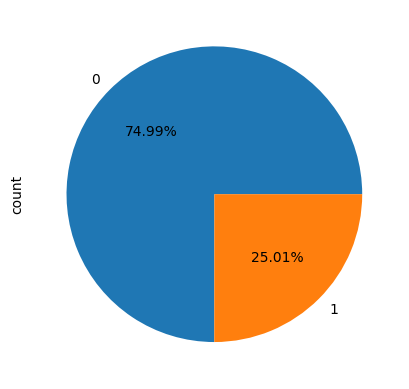

In [16]:
sub.plot(kind='pie',subplots=True,autopct='%1.2f%%')

In [17]:
def func(col):
    sns.boxplot(y=col,data=df)
    plt.show()

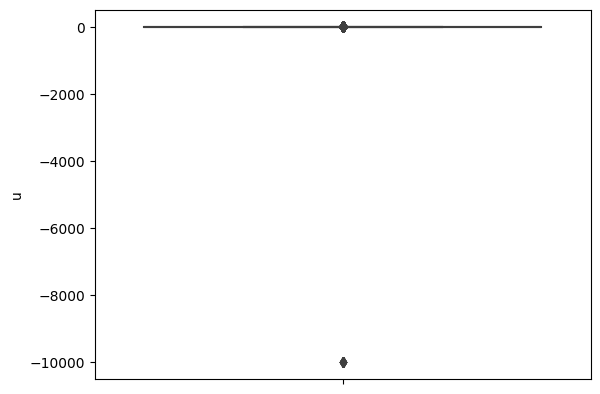

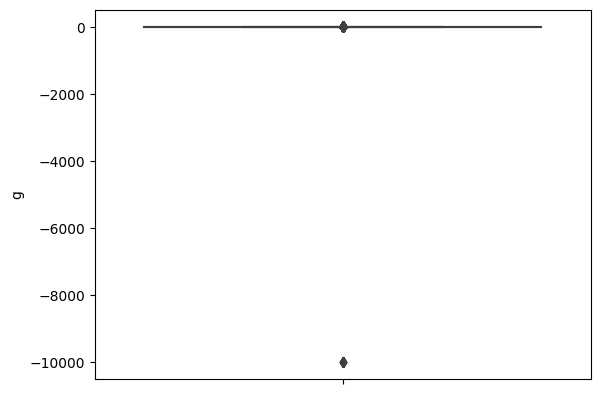

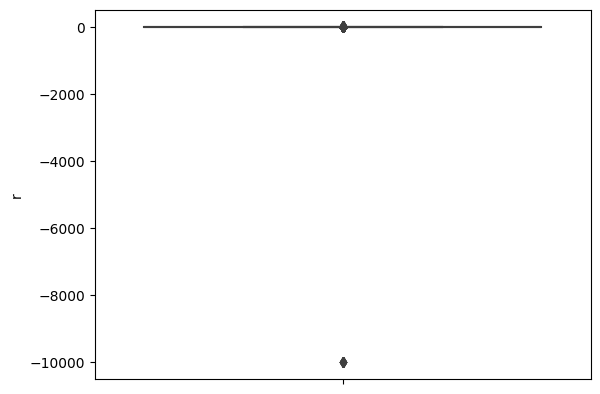

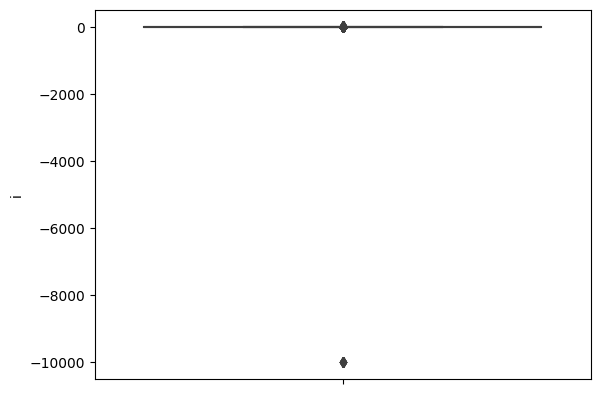

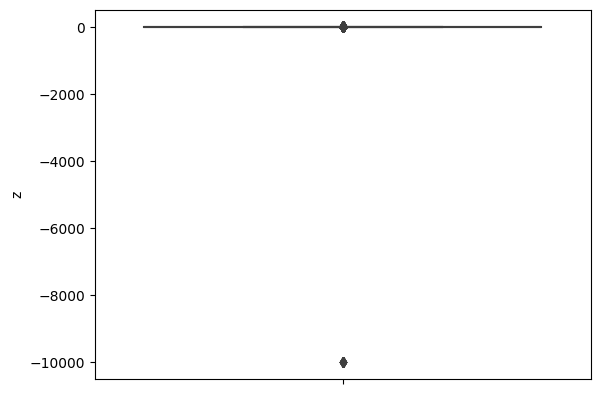

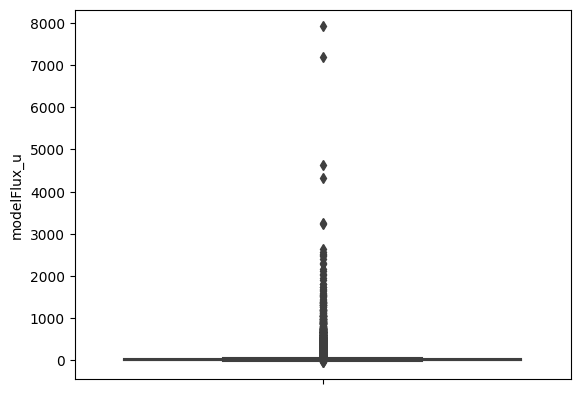

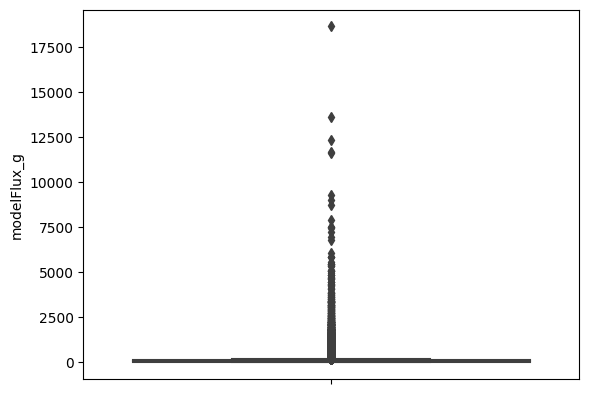

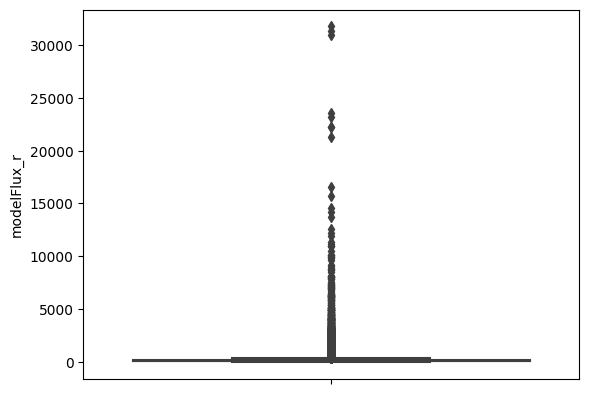

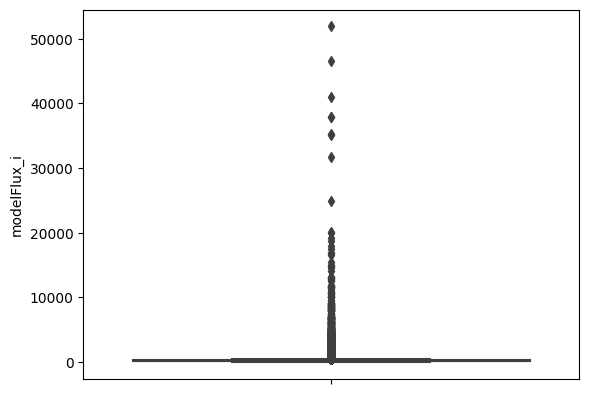

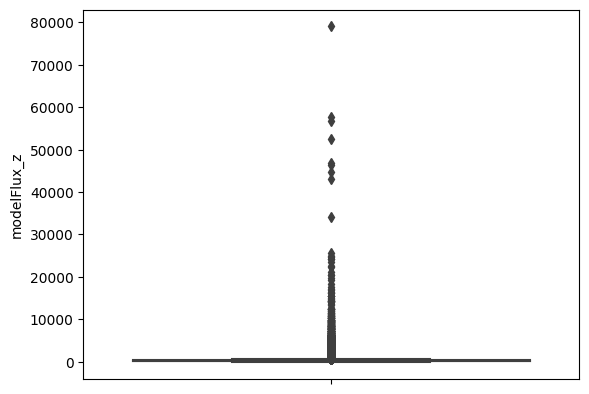

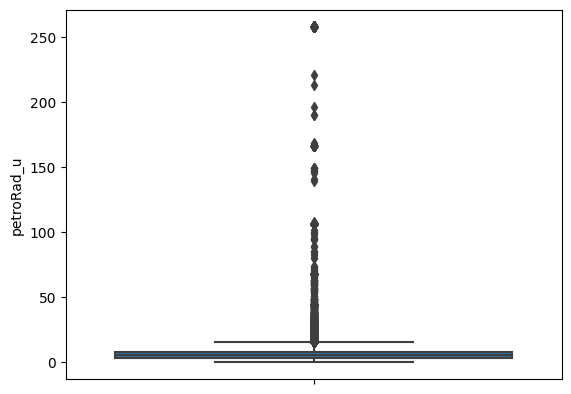

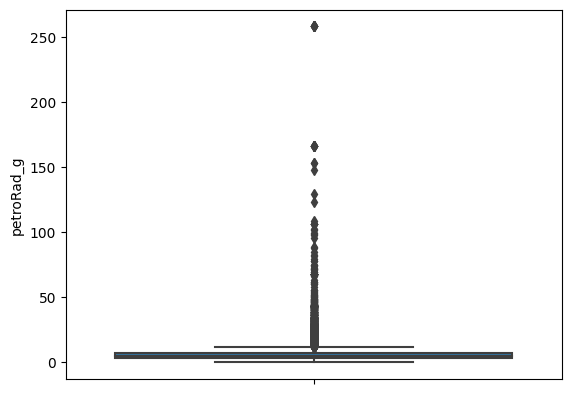

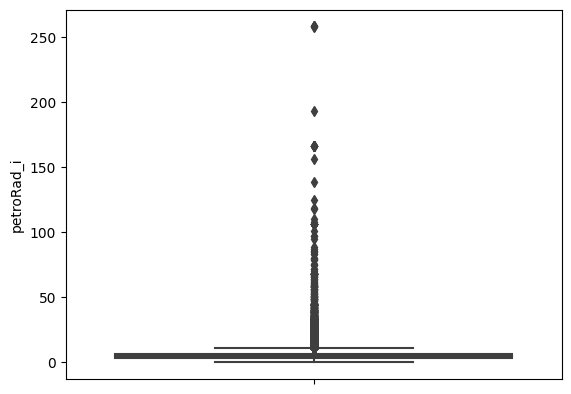

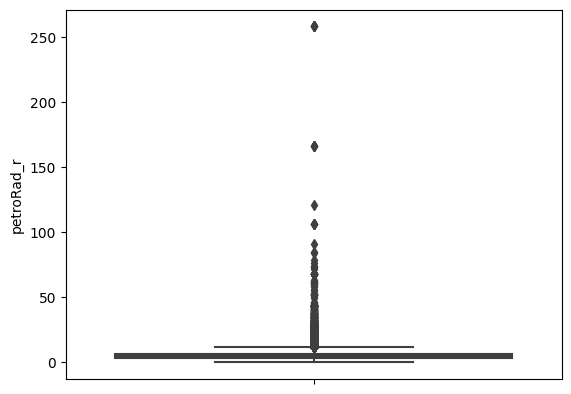

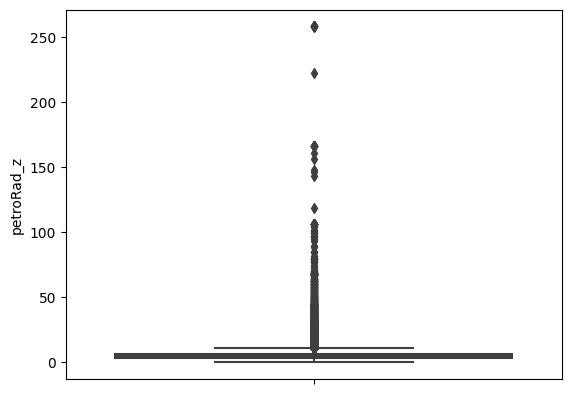

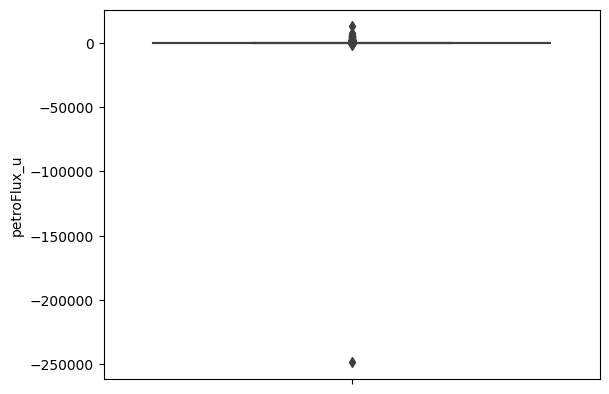

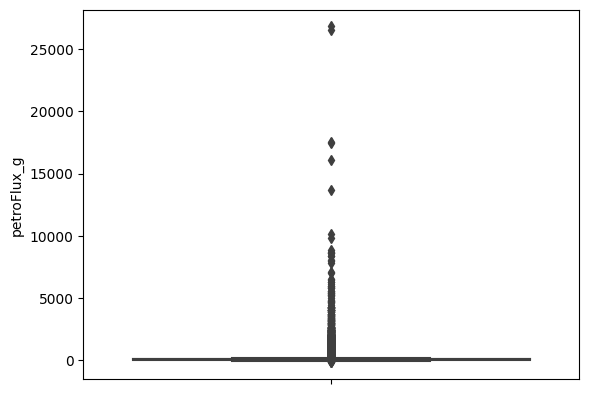

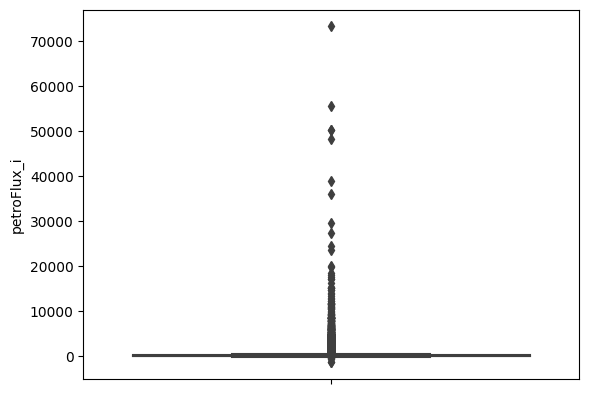

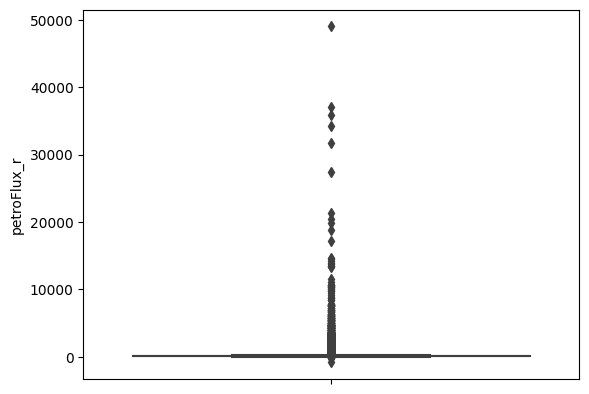

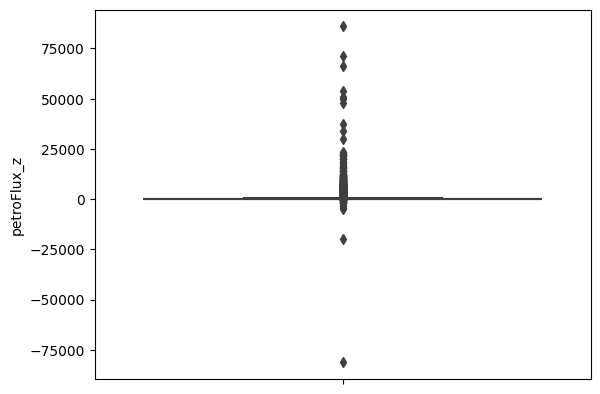

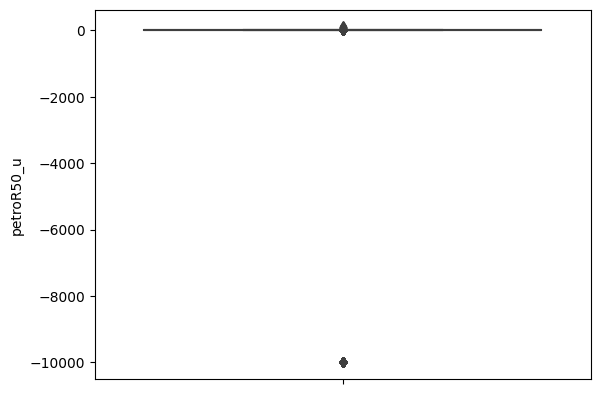

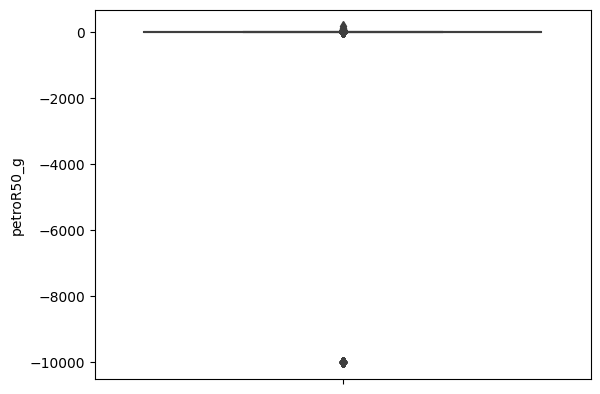

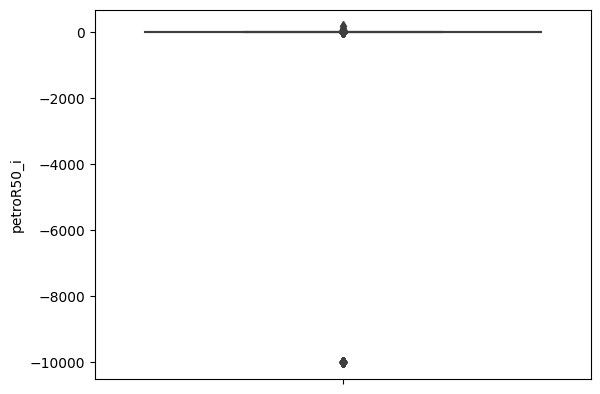

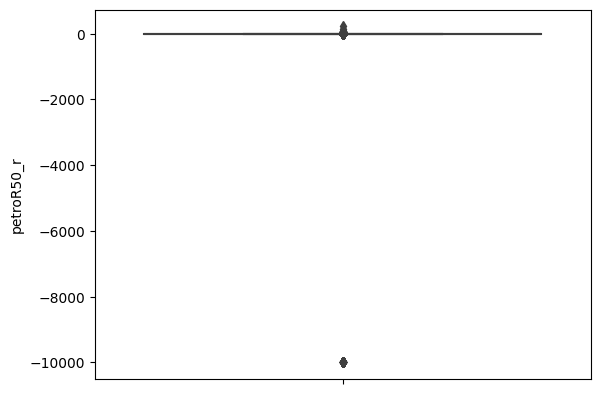

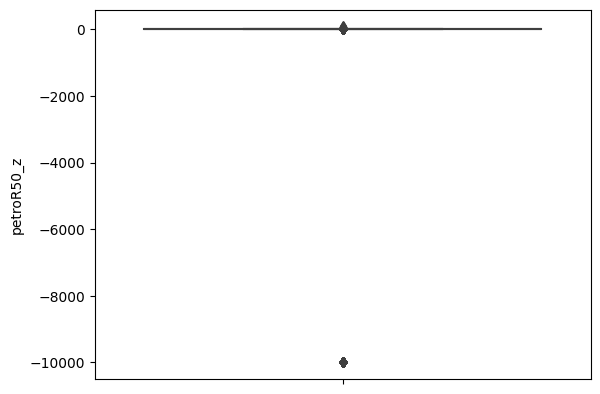

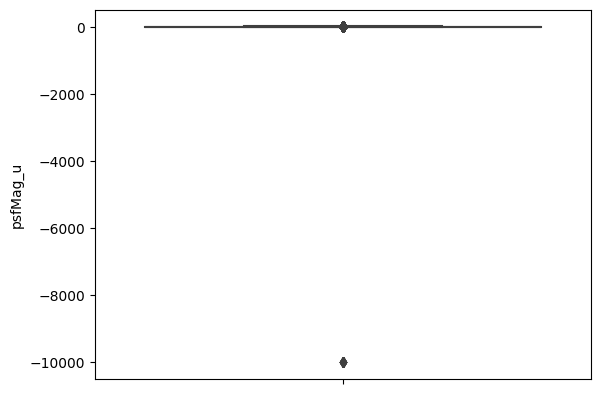

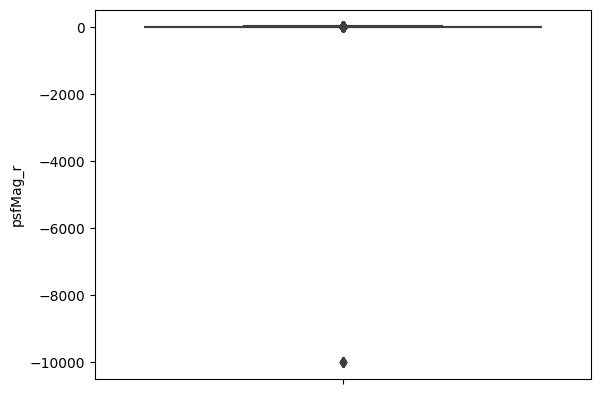

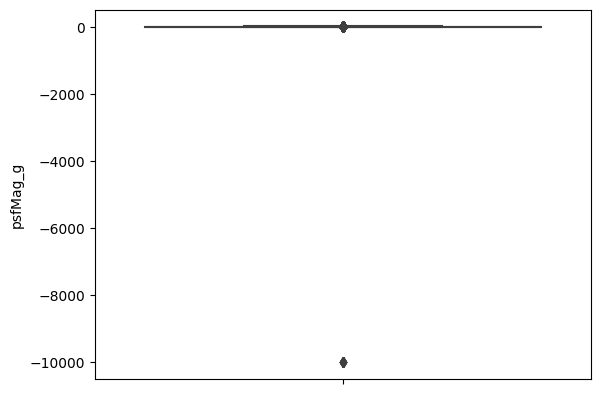

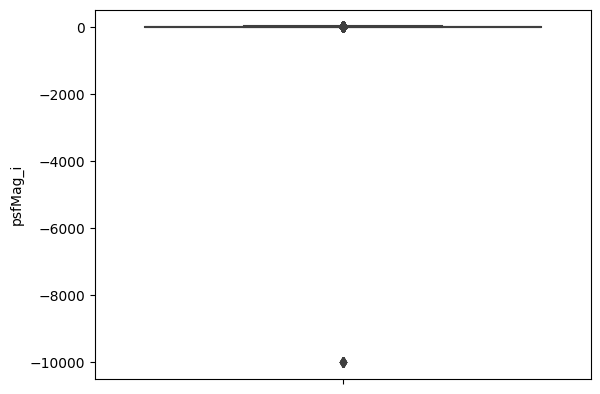

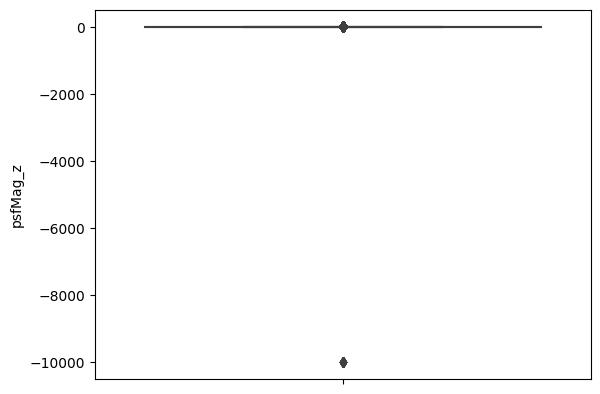

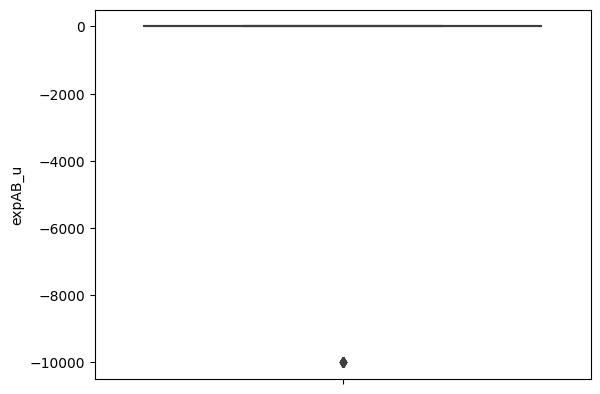

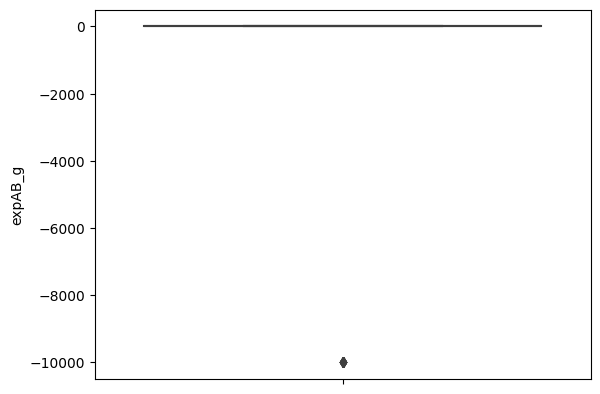

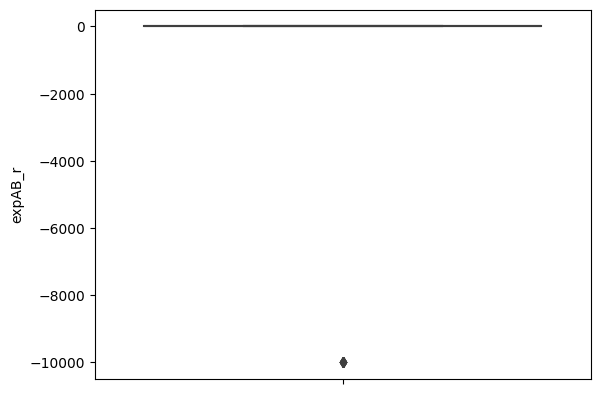

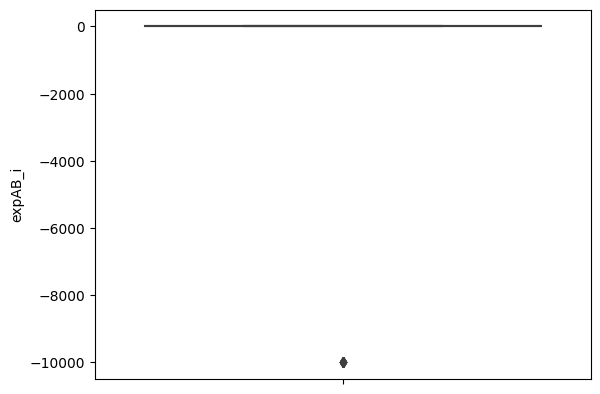

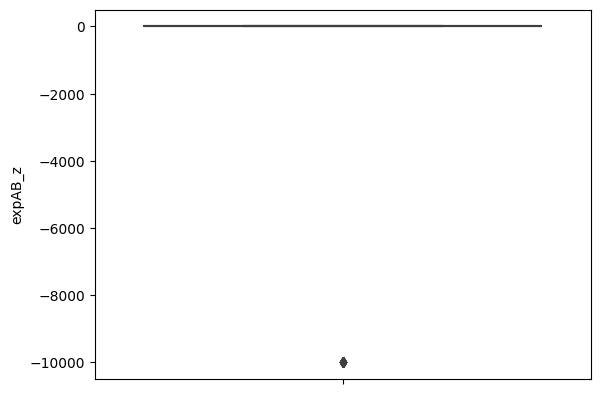

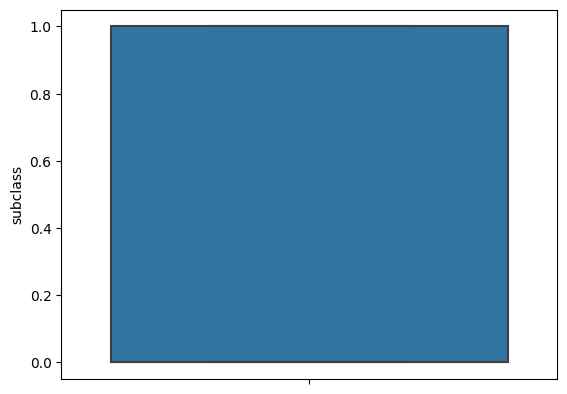

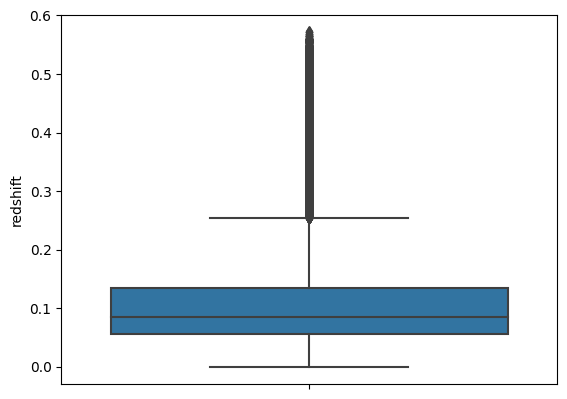

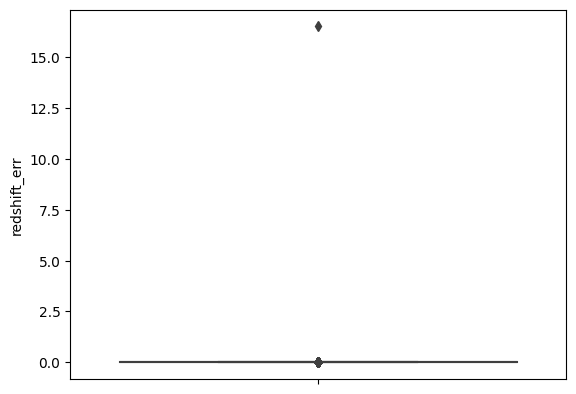

In [18]:
for i  in df.columns:
    func(i)

## Bivariate analysis
**Bivariate analysis is employed to explore the relationship between two features**

<Axes: xlabel='subclass', ylabel='i'>

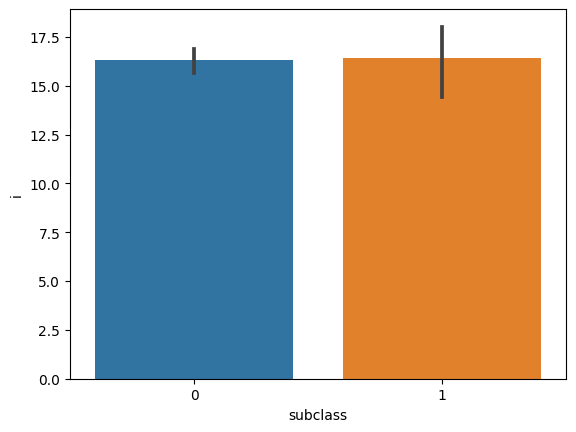

In [19]:
sns.barplot(x='subclass',y='i',data=df)

<Axes: xlabel='subclass', ylabel='z'>

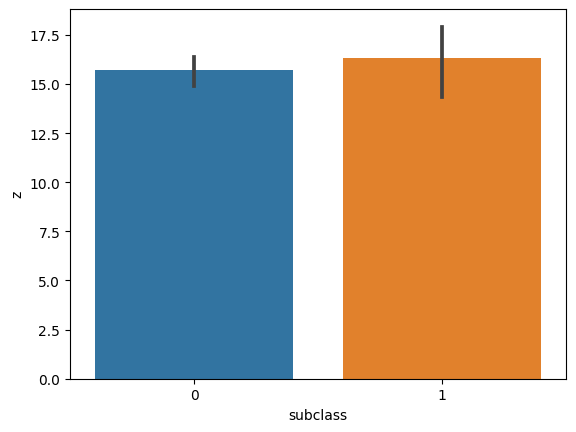

In [20]:
sns.barplot(x='subclass',y='z',data=df)

## Multivariate analysis

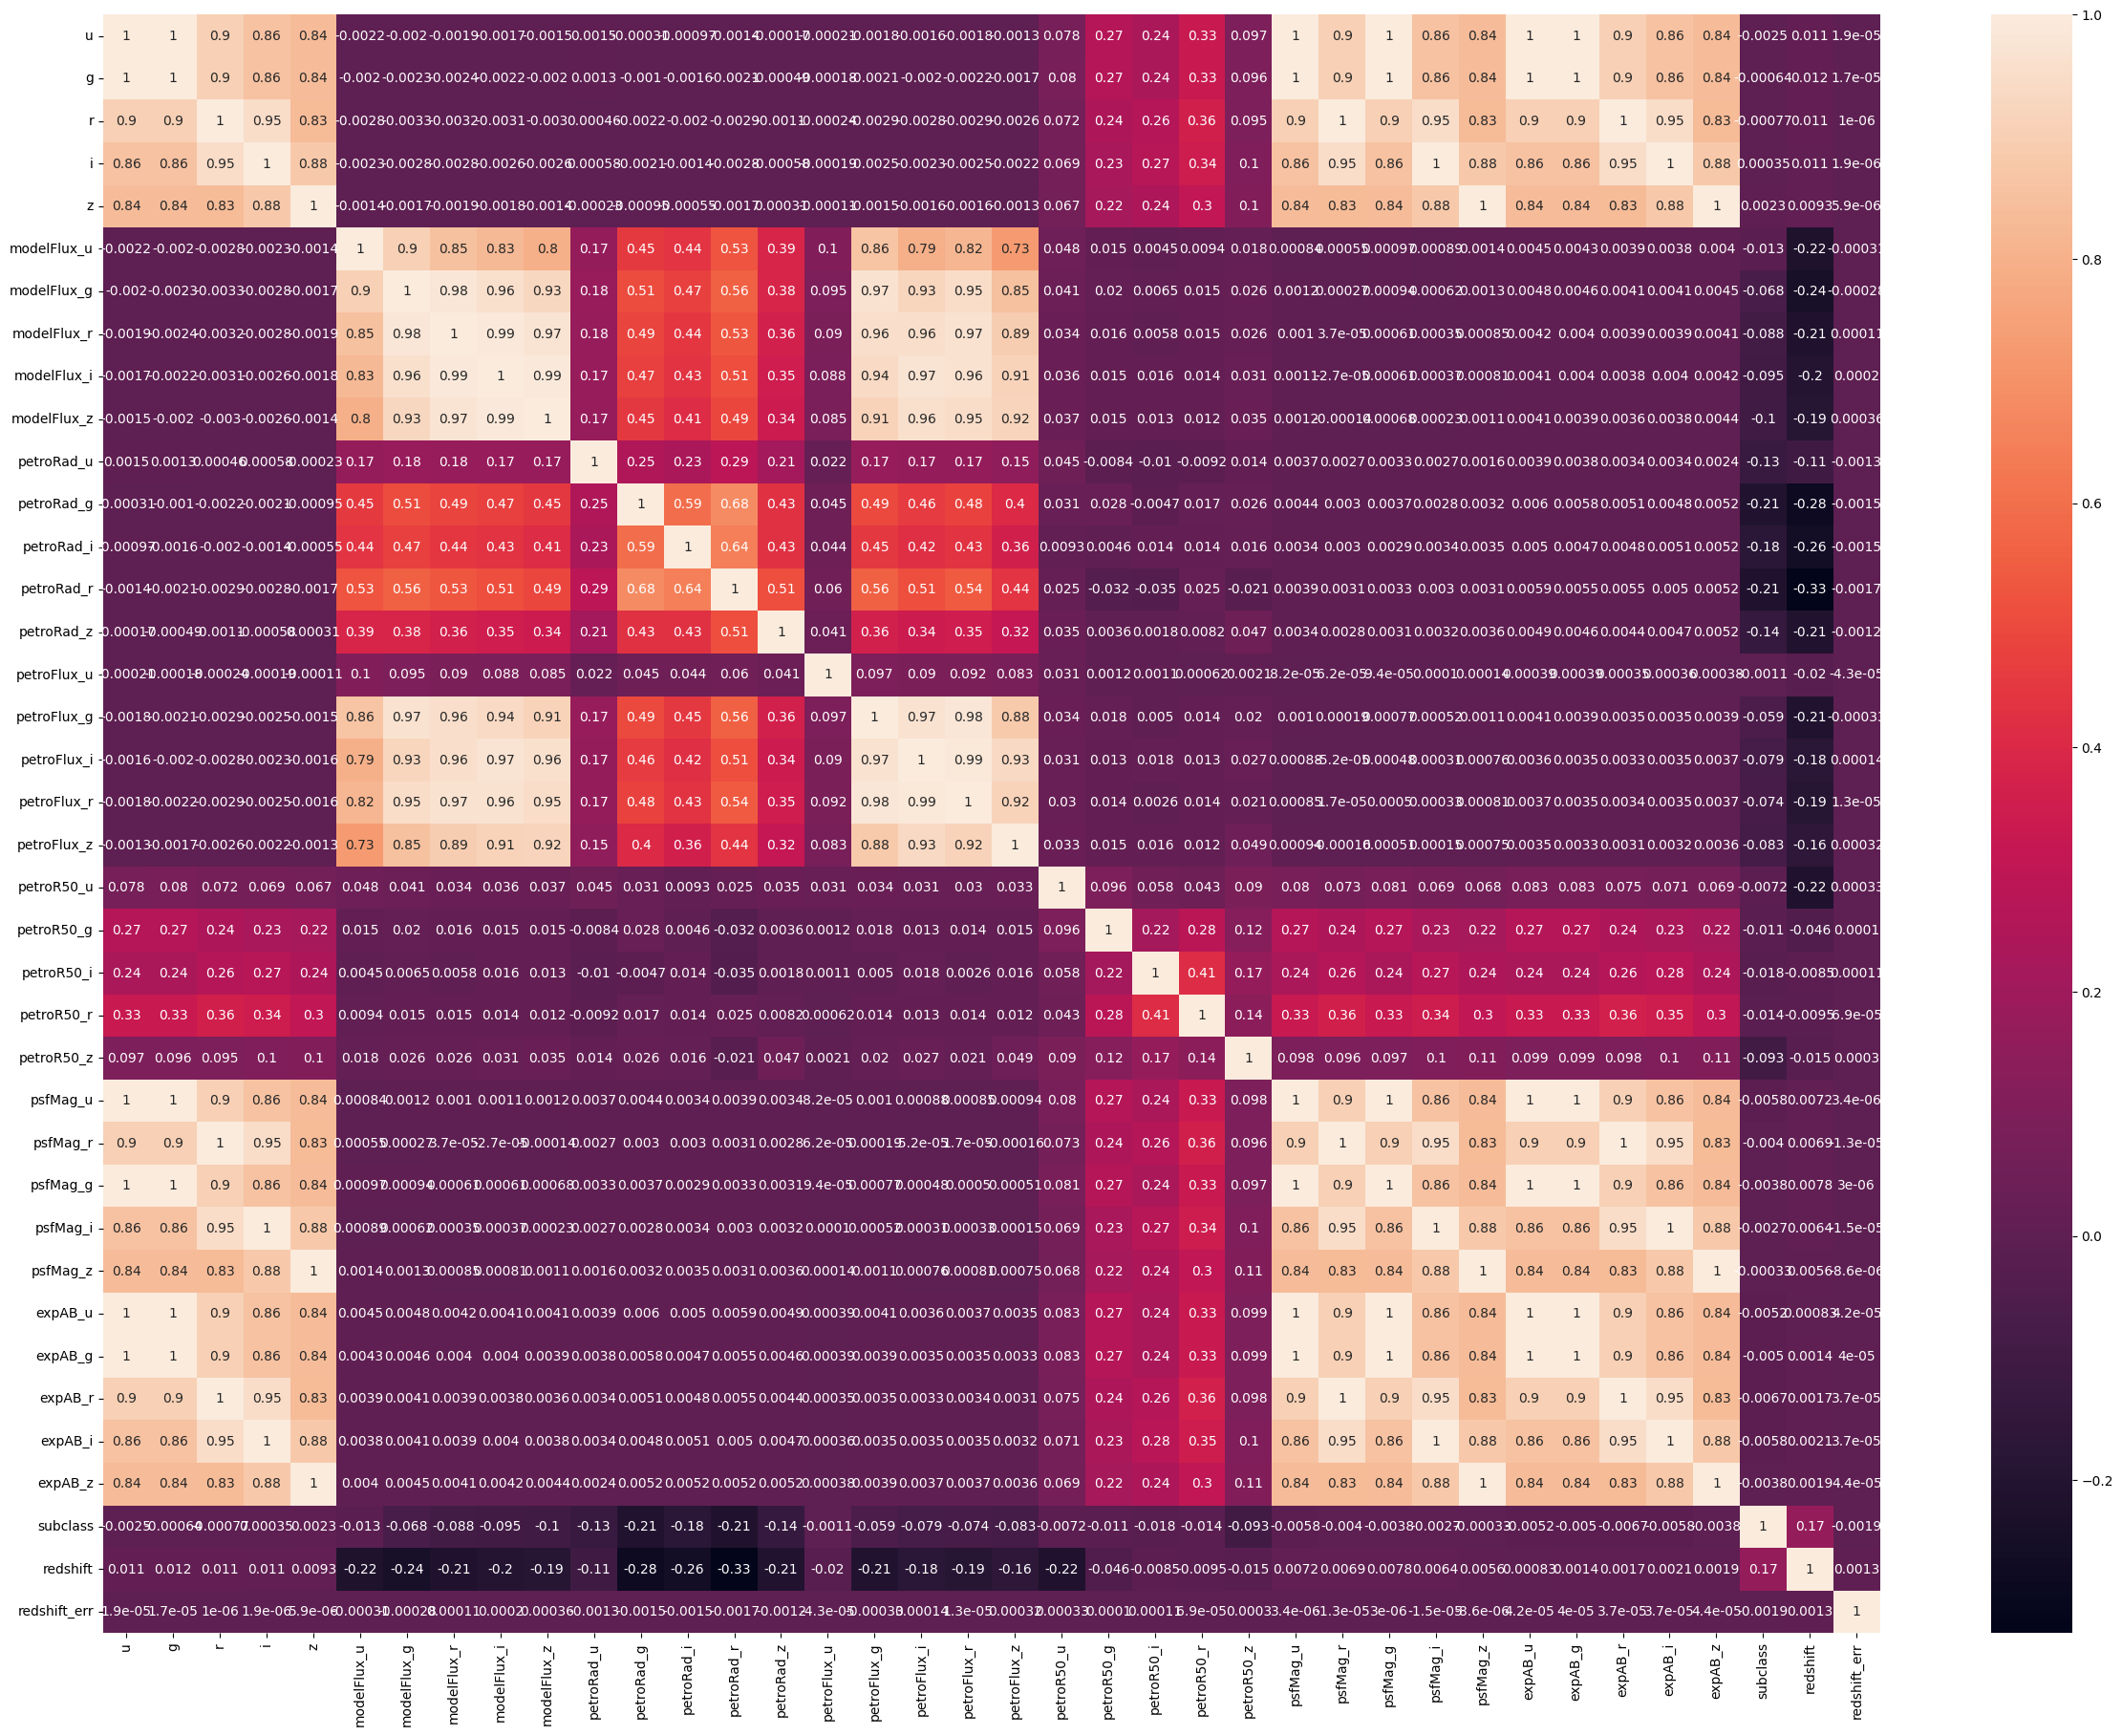

In [21]:

plt.figure(figsize=(30, 22))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Handling the outliers

<Axes: ylabel='u'>

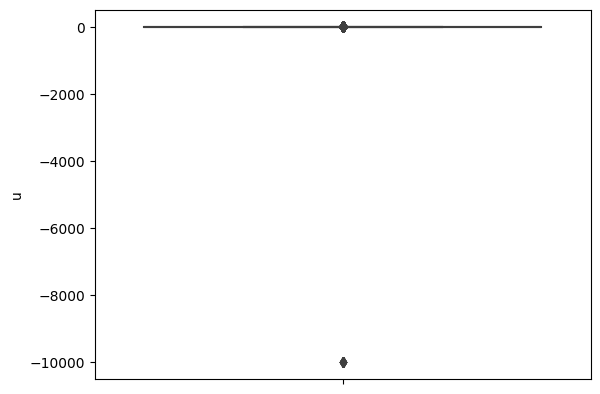

In [22]:
sns.boxplot(y='u',data=df)

In [23]:
quant=df['u'].quantile(q=[0.75,0.25])
quant

0.75    20.079470
0.25    18.762215
Name: u, dtype: float64

In [24]:
Q3=quant.loc[0.75]
Q3

20.07947

In [25]:
Q1=quant.loc[0.25]
Q1

18.762214999999998

In [26]:
IQR=Q3-Q1
IQR

1.317255000000003

In [27]:
maxwhisker=Q3+1.5*IQR
maxwhisker

22.055352500000005

In [28]:
minwhisker=Q1-1.5*IQR
minwhisker

16.786332499999993

In [29]:
df['u']=np.where(df['u']>20.07947,20.07947,df['u'])
df['u']=np.where(df['u']<18.762214999999998,18.762214999999998,df['u'])

<Axes: ylabel='u'>

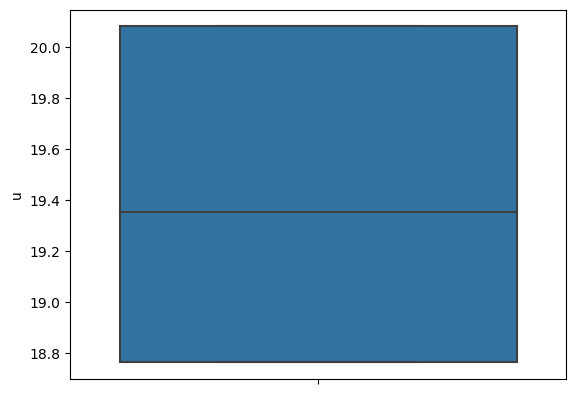

In [30]:
sns.boxplot(y='u',data=df)

Column: u
Upper Bound for Outliers: 22.055346875000005
Lower Bound for Outliers: 16.786341874999998


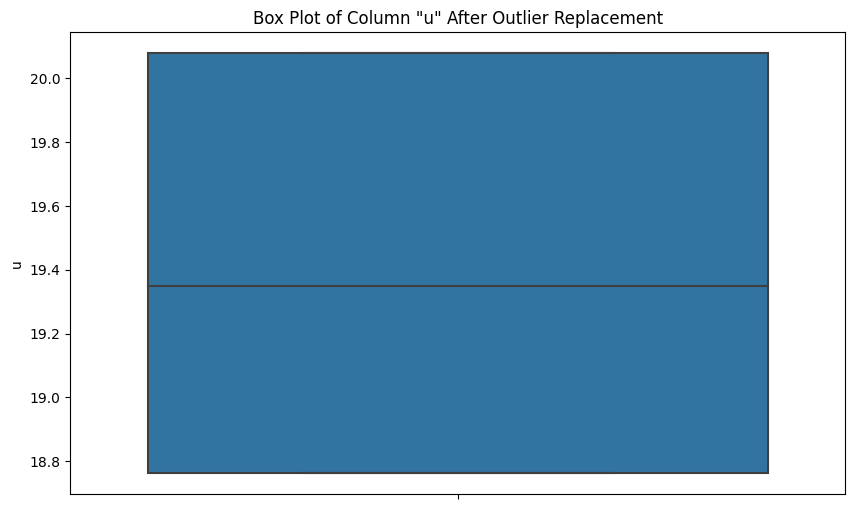

Column: g
Upper Bound for Outliers: 20.381655
Lower Bound for Outliers: 15.780395000000002


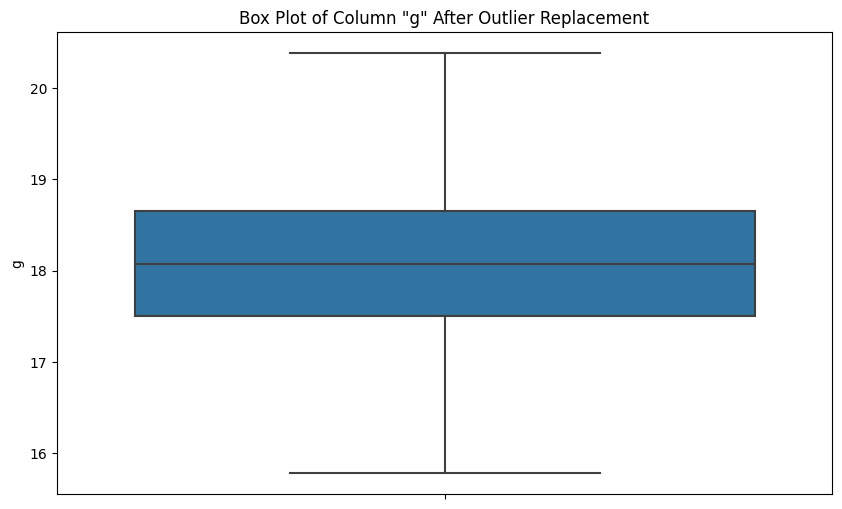

Column: r
Upper Bound for Outliers: 19.469026250000002
Lower Bound for Outliers: 15.35673625


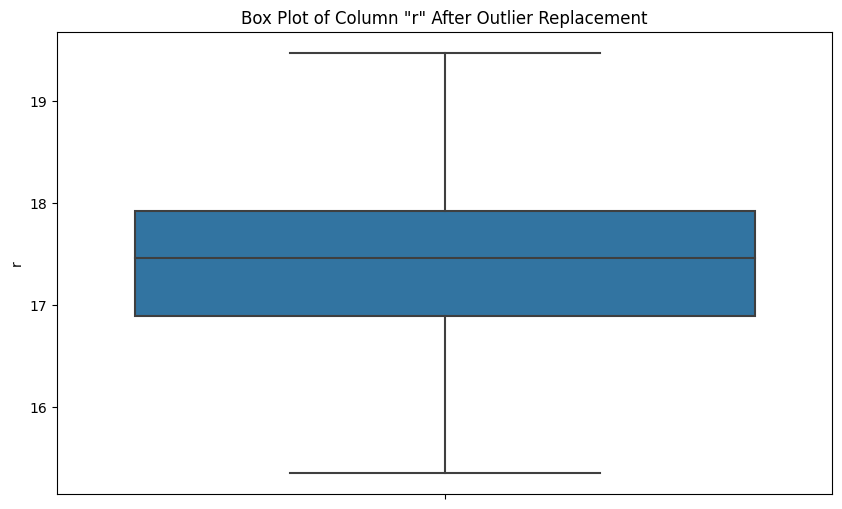

Column: i
Upper Bound for Outliers: 19.19097875
Lower Bound for Outliers: 14.928768750000001


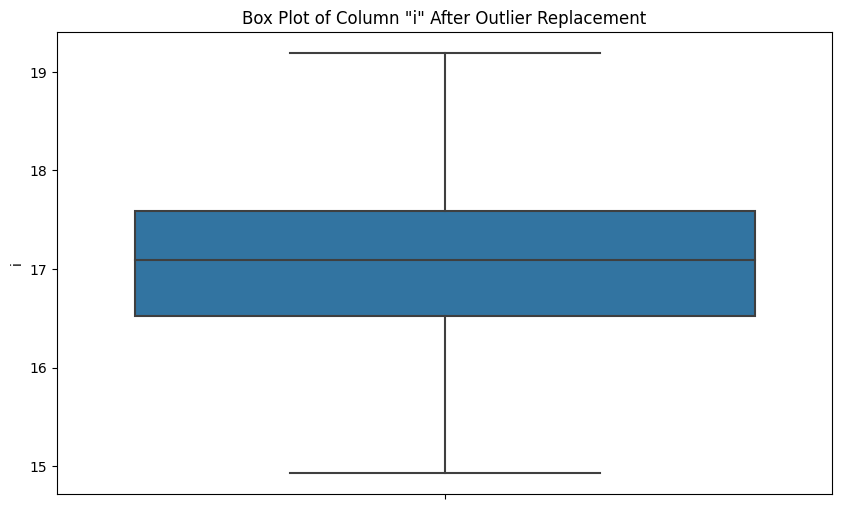

Column: z
Upper Bound for Outliers: 19.212627500000004
Lower Bound for Outliers: 14.522547499999996


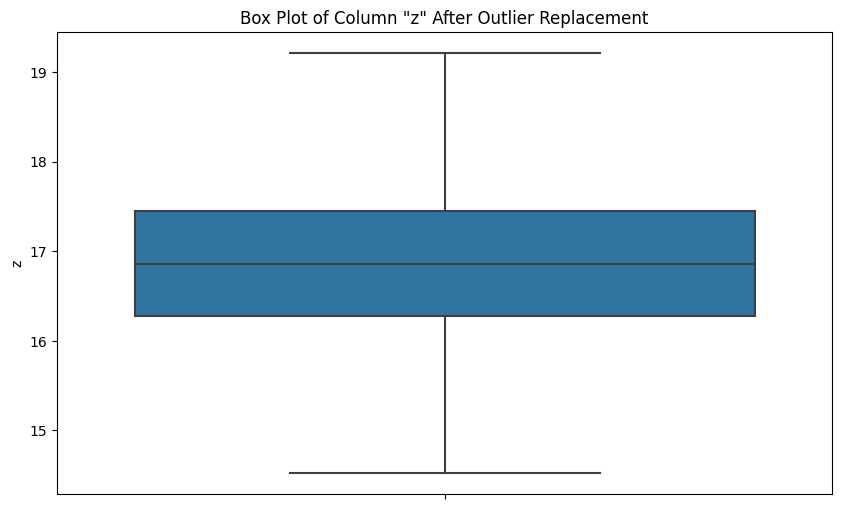

Column: modelFlux_u
Upper Bound for Outliers: 64.21687075
Lower Bound for Outliers: -23.669111249999997


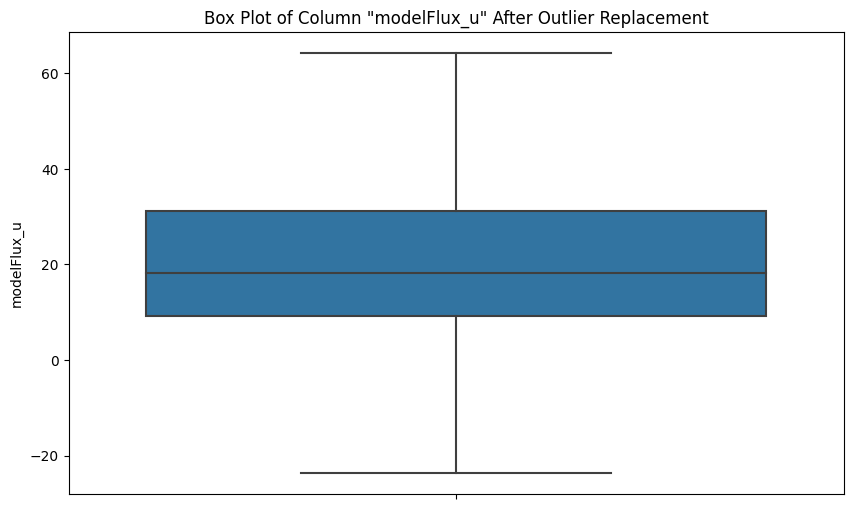

Column: modelFlux_g
Upper Bound for Outliers: 196.90068374999998
Lower Bound for Outliers: -62.99976624999999


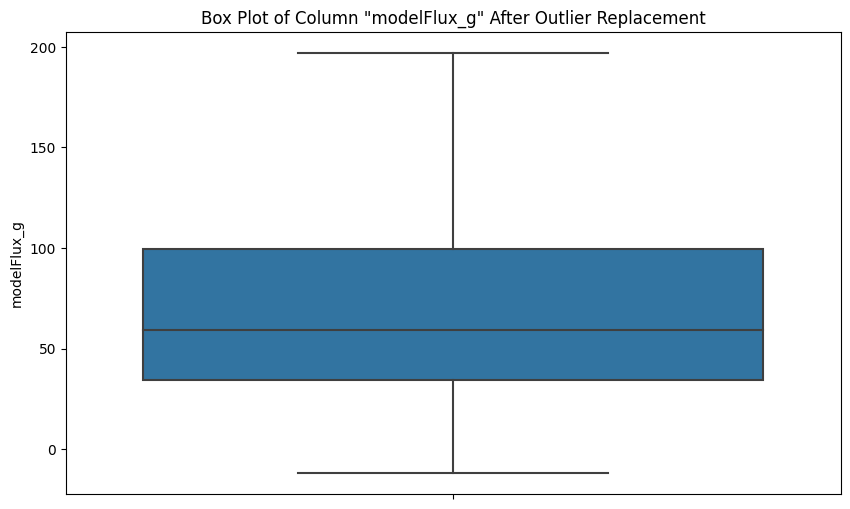

Column: modelFlux_r
Upper Bound for Outliers: 333.6421975
Lower Bound for Outliers: -92.25906250000001


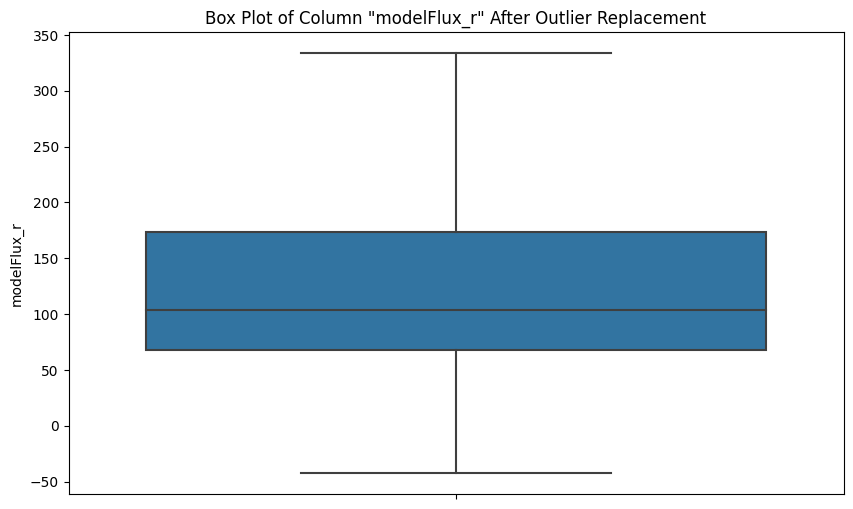

Column: modelFlux_i
Upper Bound for Outliers: 474.69607499999995
Lower Bound for Outliers: -137.97392499999995


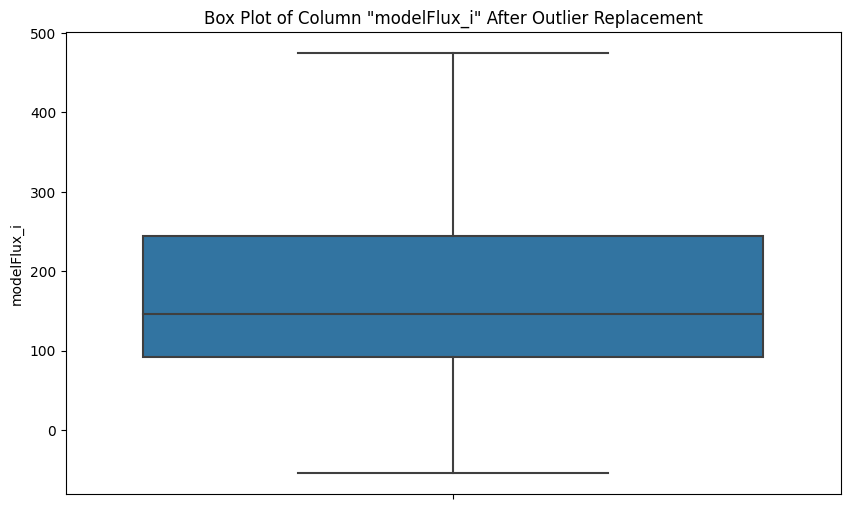

Column: modelFlux_z
Upper Bound for Outliers: 611.2268624999999
Lower Bound for Outliers: -199.92563749999994


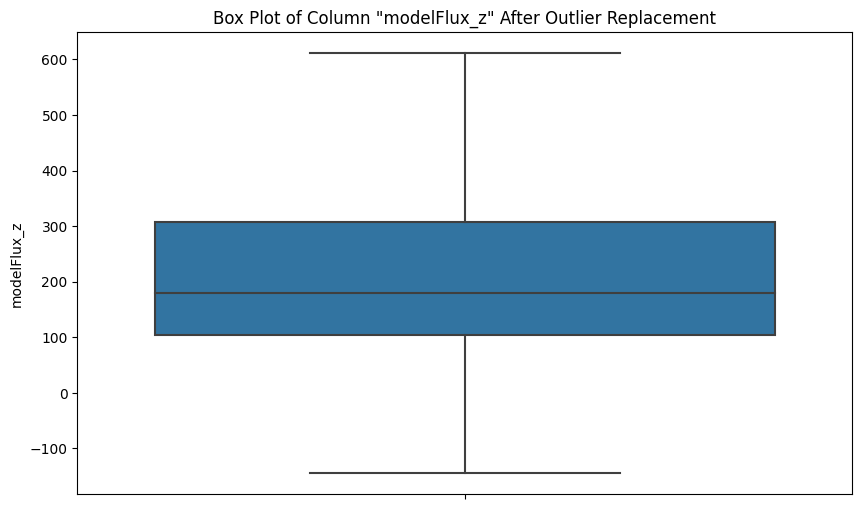

Column: petroRad_u
Upper Bound for Outliers: 15.490691875
Lower Bound for Outliers: -3.9904171249999996


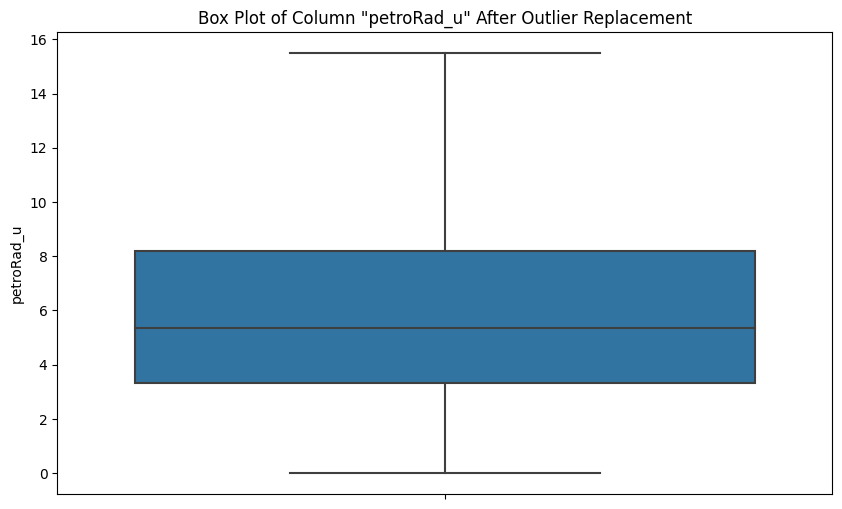

Column: petroRad_g
Upper Bound for Outliers: 12.222739500000001
Lower Bound for Outliers: -1.897624500000001


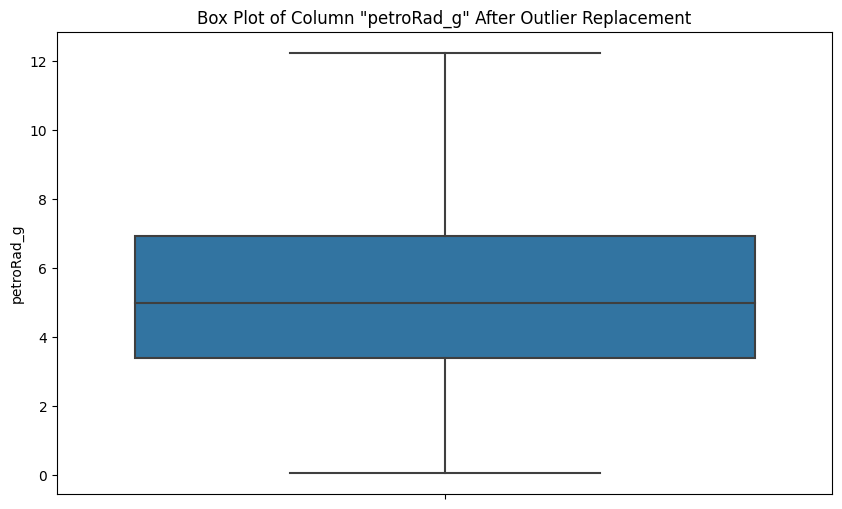

Column: petroRad_i
Upper Bound for Outliers: 11.28945375
Lower Bound for Outliers: -1.372438250000001


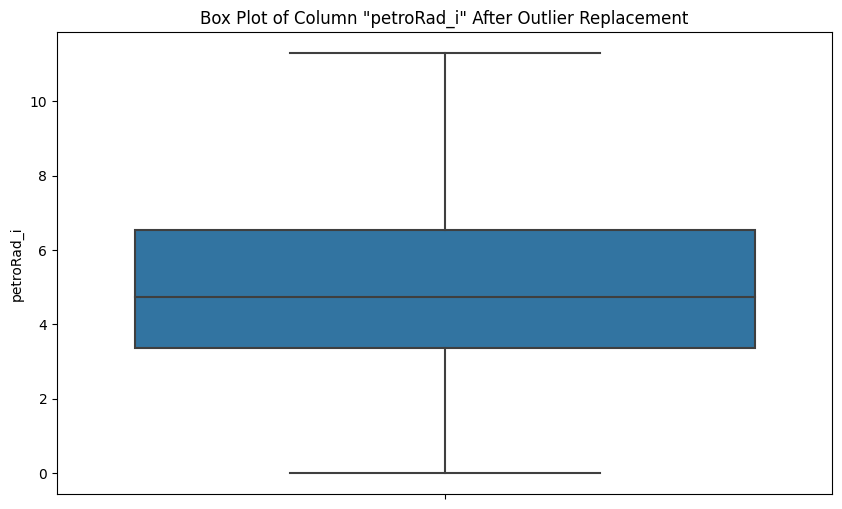

Column: petroRad_r
Upper Bound for Outliers: 11.676203000000001
Lower Bound for Outliers: -1.5261750000000012


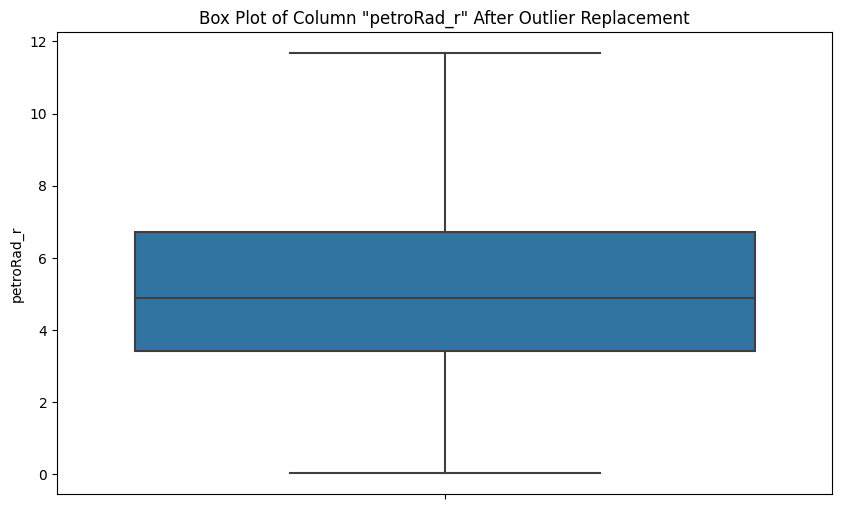

Column: petroRad_z
Upper Bound for Outliers: 11.212585874999998
Lower Bound for Outliers: -1.2890891249999994


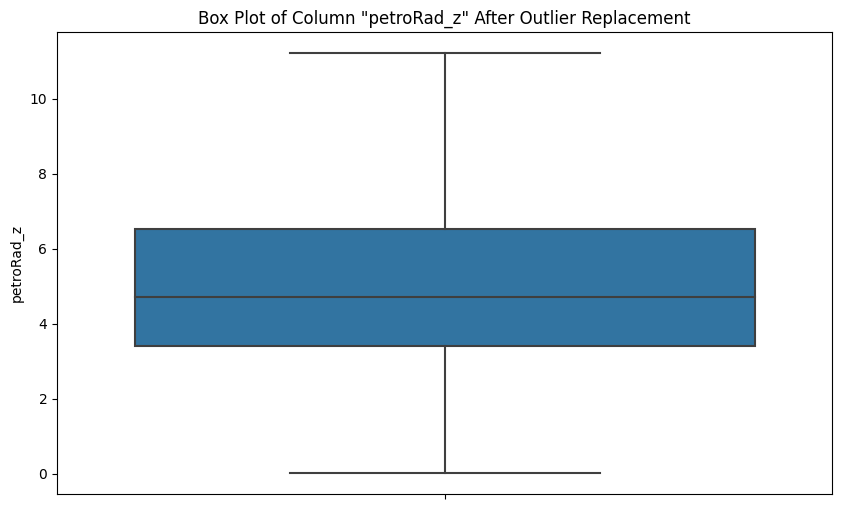

Column: petroFlux_u
Upper Bound for Outliers: 65.49768775
Lower Bound for Outliers: -24.47496625


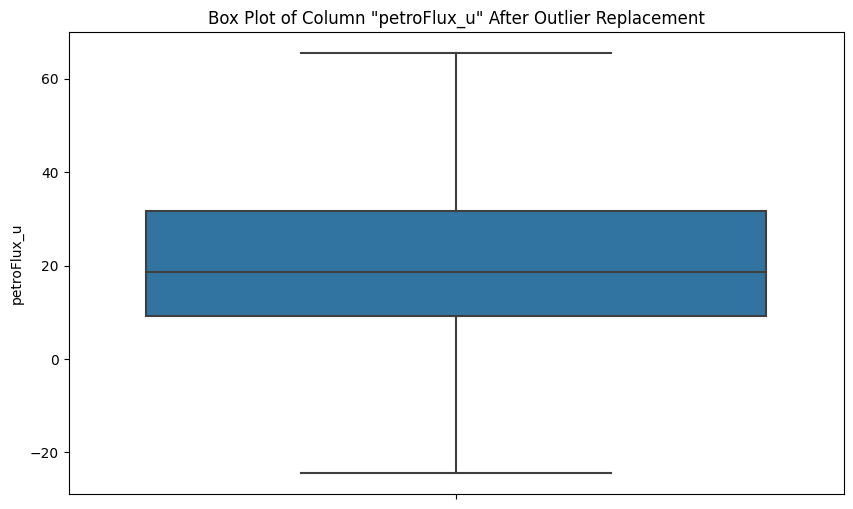

Column: petroFlux_g
Upper Bound for Outliers: 191.49622
Lower Bound for Outliers: -60.58846


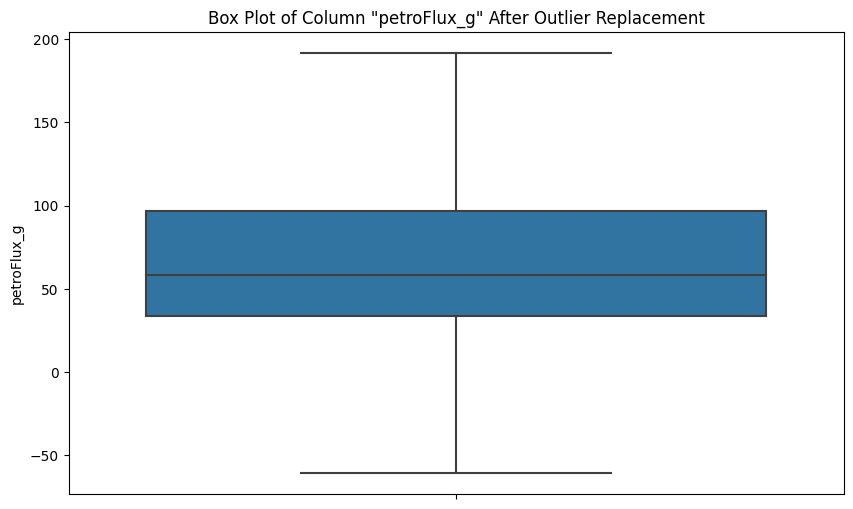

Column: petroFlux_i
Upper Bound for Outliers: 437.03996125
Lower Bound for Outliers: -122.68726874999999


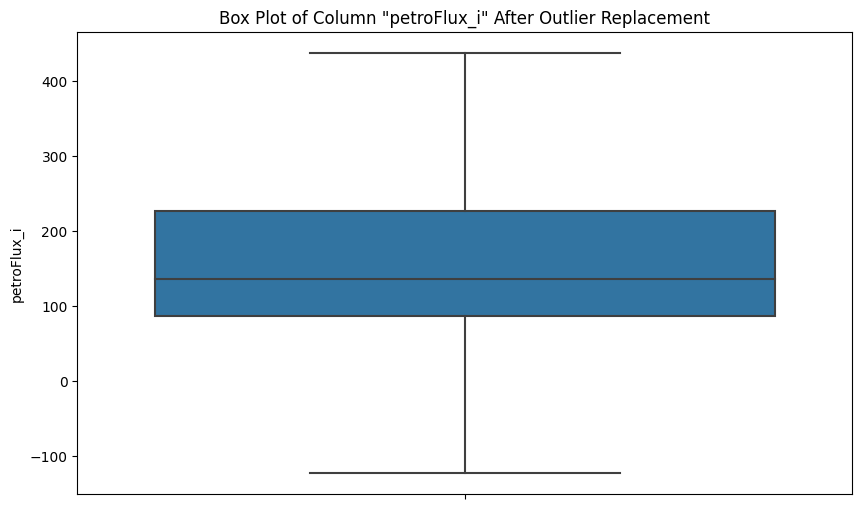

Column: petroFlux_r
Upper Bound for Outliers: 314.61387874999997
Lower Bound for Outliers: -82.84313124999997


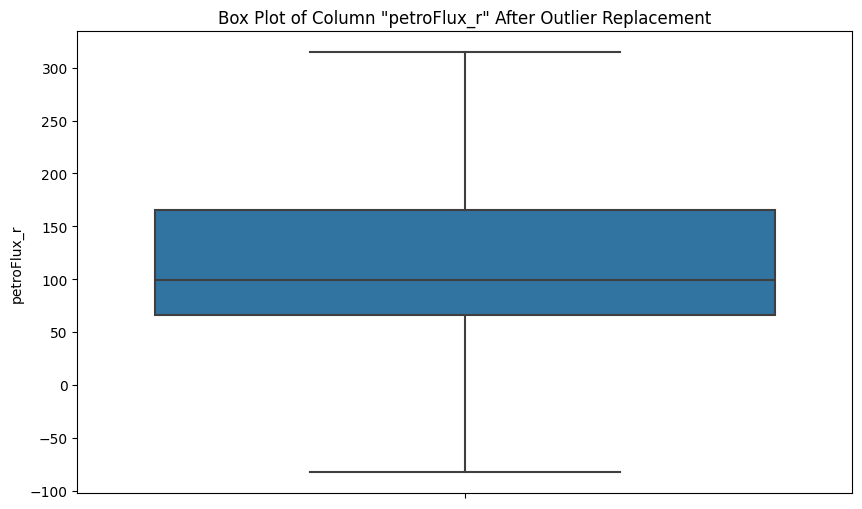

Column: petroFlux_z
Upper Bound for Outliers: 540.08705375
Lower Bound for Outliers: -178.90415625


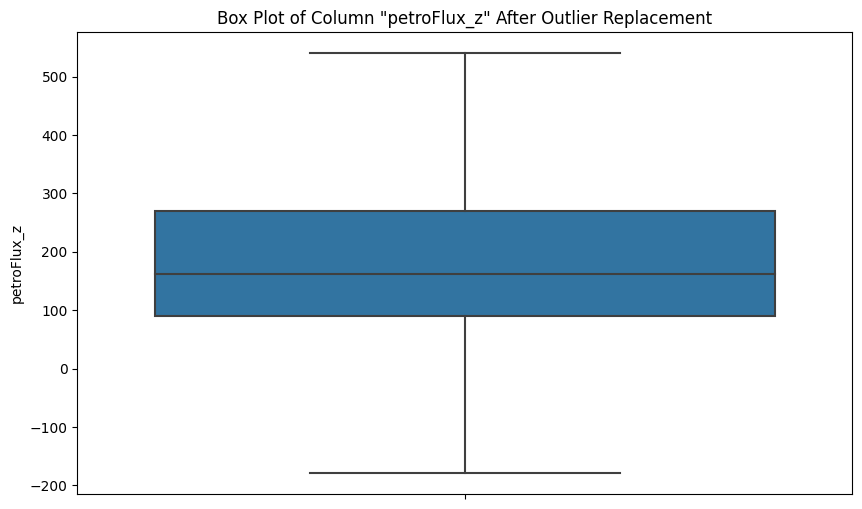

Column: petroR50_u
Upper Bound for Outliers: 6.1233509999999995
Lower Bound for Outliers: -1.093203


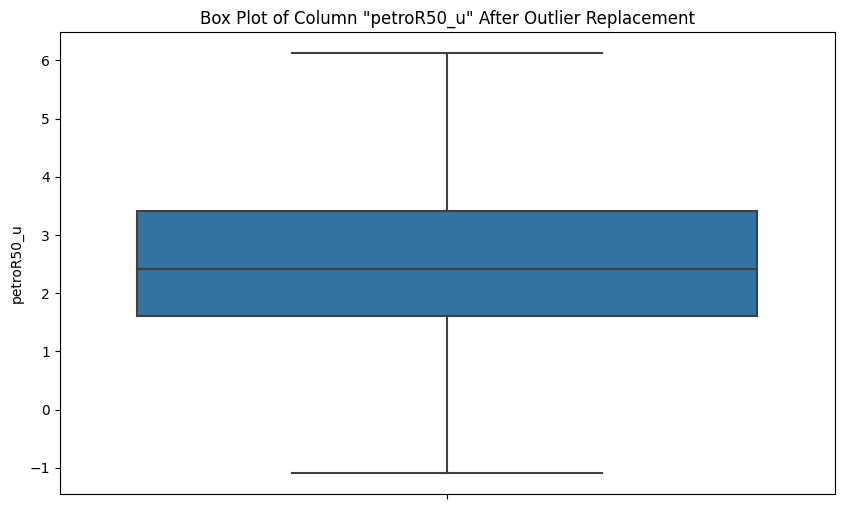

Column: petroR50_g
Upper Bound for Outliers: 5.606375875
Lower Bound for Outliers: -0.7522371250000002


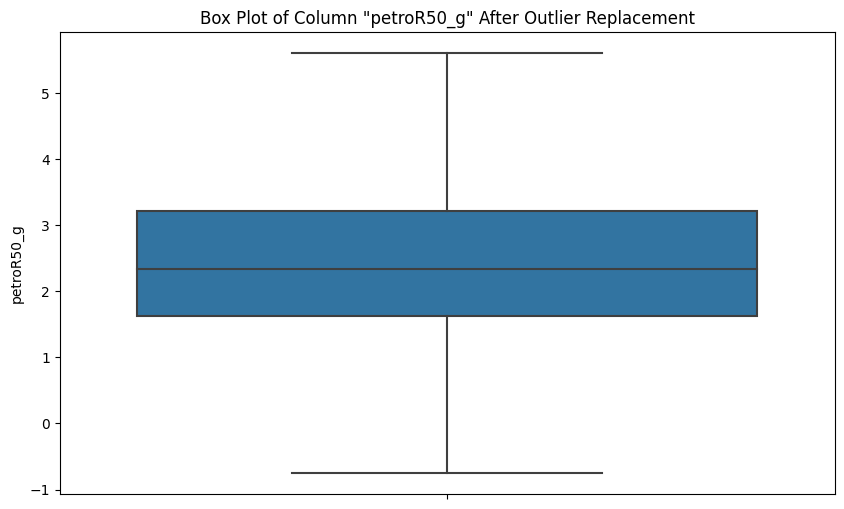

Column: petroR50_i
Upper Bound for Outliers: 5.103804499999999
Lower Bound for Outliers: -0.5851314999999992


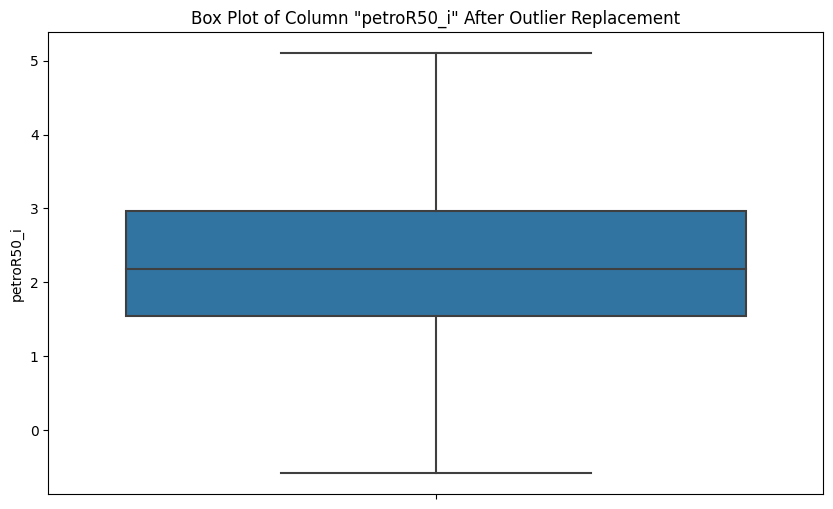

Column: petroR50_r
Upper Bound for Outliers: 5.2709107500000005
Lower Bound for Outliers: -0.6087272499999998


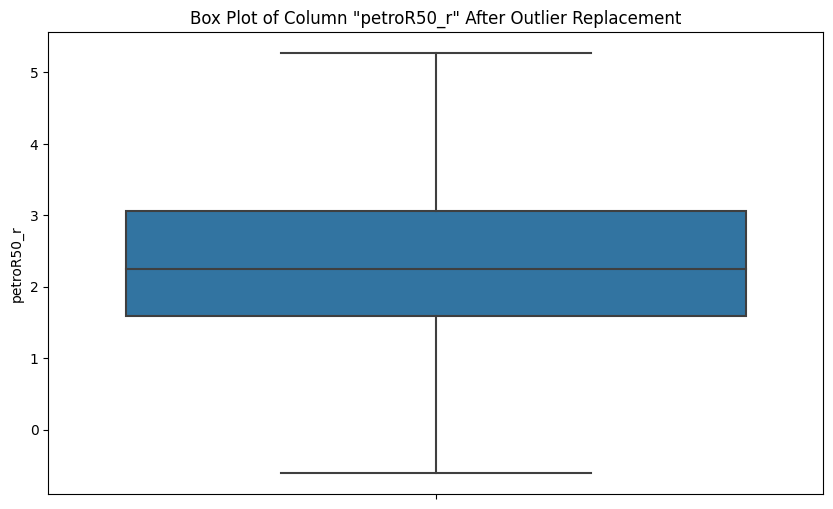

Column: petroR50_z
Upper Bound for Outliers: 4.731718125
Lower Bound for Outliers: -0.4320048750000005


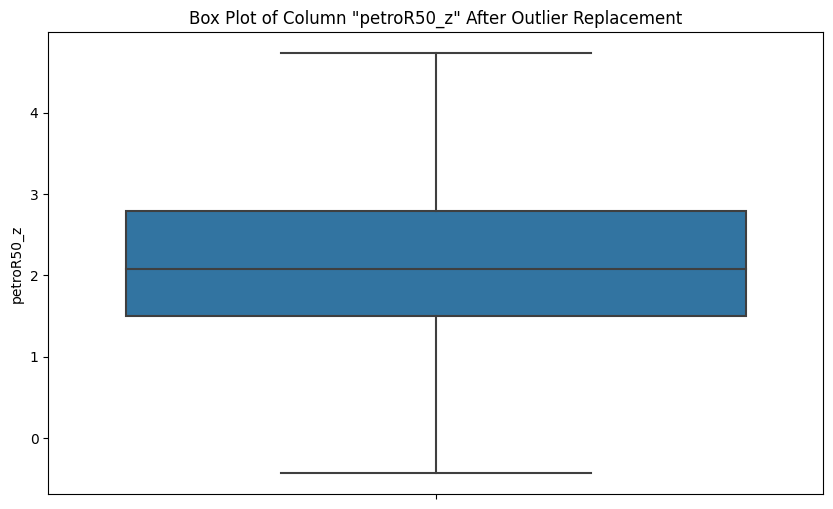

Column: psfMag_u
Upper Bound for Outliers: 23.37818375
Lower Bound for Outliers: 18.67697375


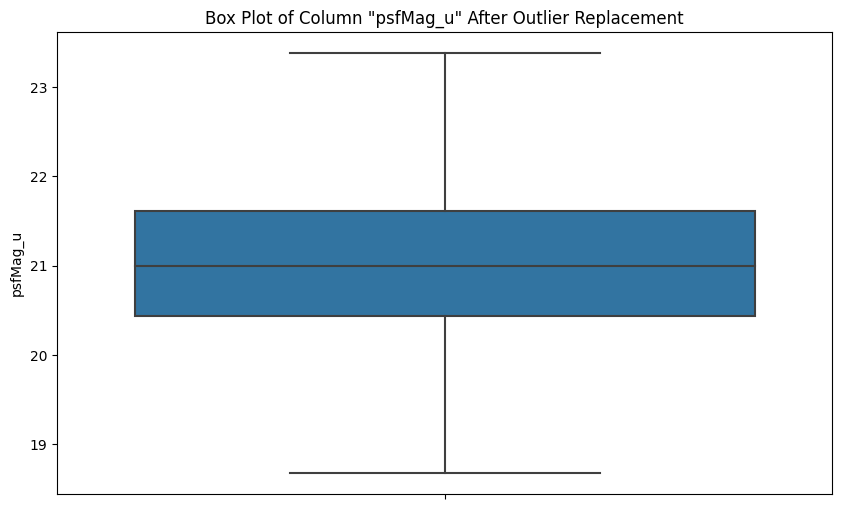

Column: psfMag_r
Upper Bound for Outliers: 21.705982499999998
Lower Bound for Outliers: 16.8410625


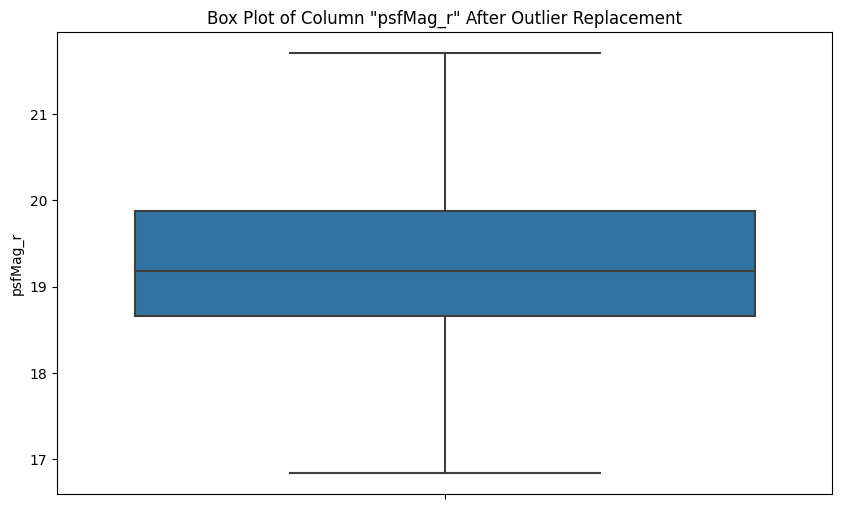

Column: psfMag_g
Upper Bound for Outliers: 22.135263749999993
Lower Bound for Outliers: 17.531293750000003


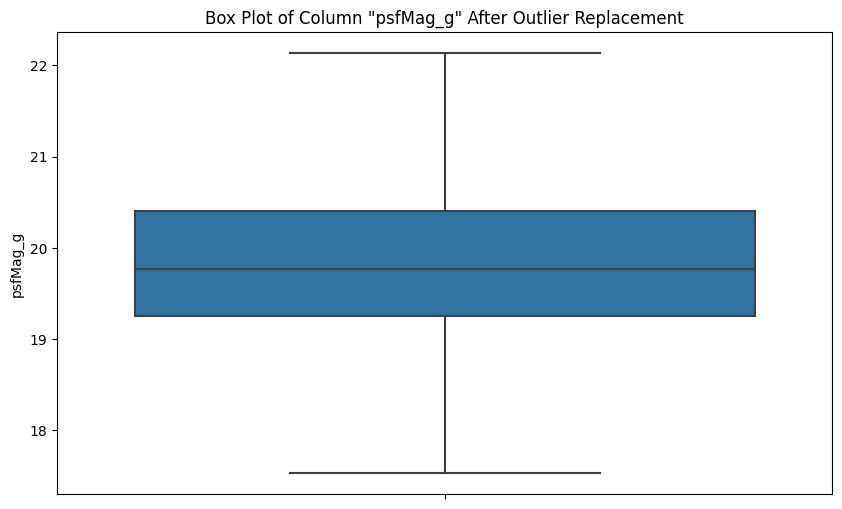

Column: psfMag_i
Upper Bound for Outliers: 21.523002499999997
Lower Bound for Outliers: 16.359202500000002


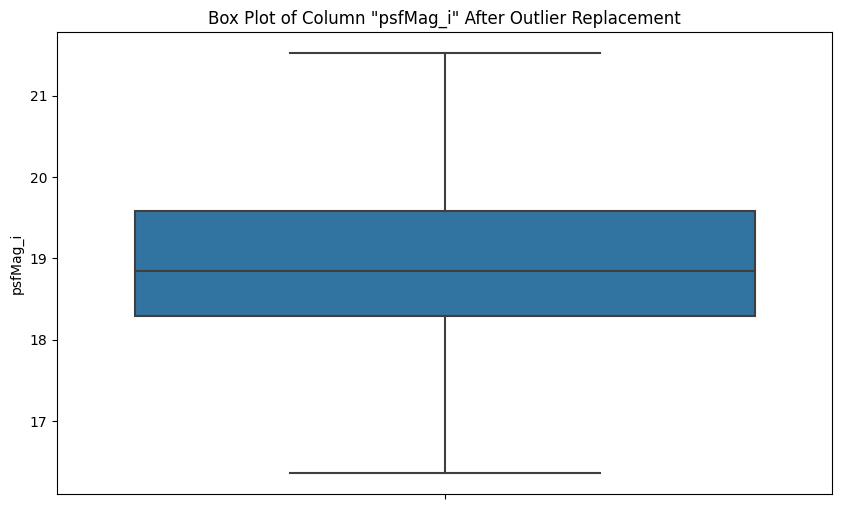

Column: psfMag_z
Upper Bound for Outliers: 21.261171250000004
Lower Bound for Outliers: 16.029861249999996


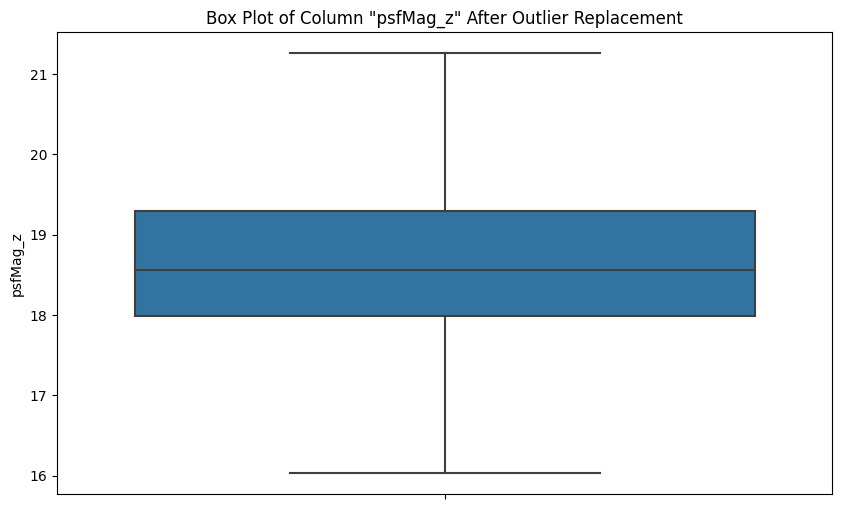

Column: expAB_u
Upper Bound for Outliers: 1.2997675249999998
Lower Bound for Outliers: -0.2998614749999998


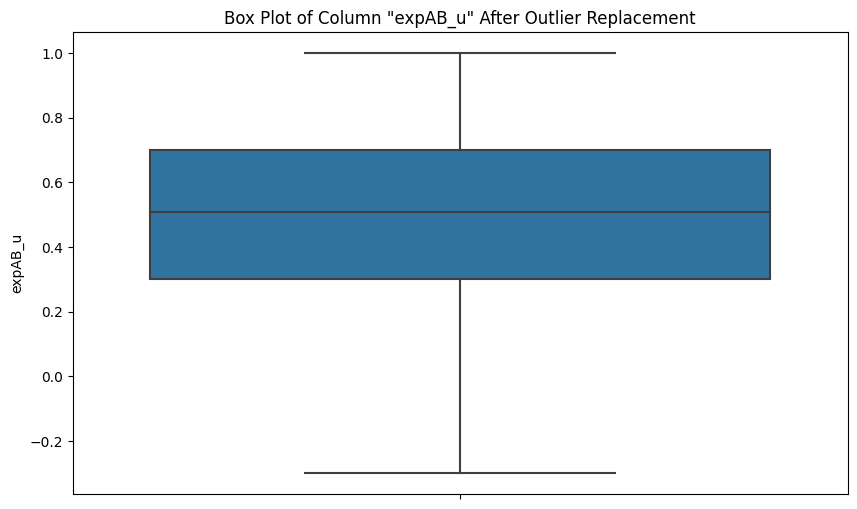

Column: expAB_g
Upper Bound for Outliers: 1.3239540625
Lower Bound for Outliers: -0.15644523749999983


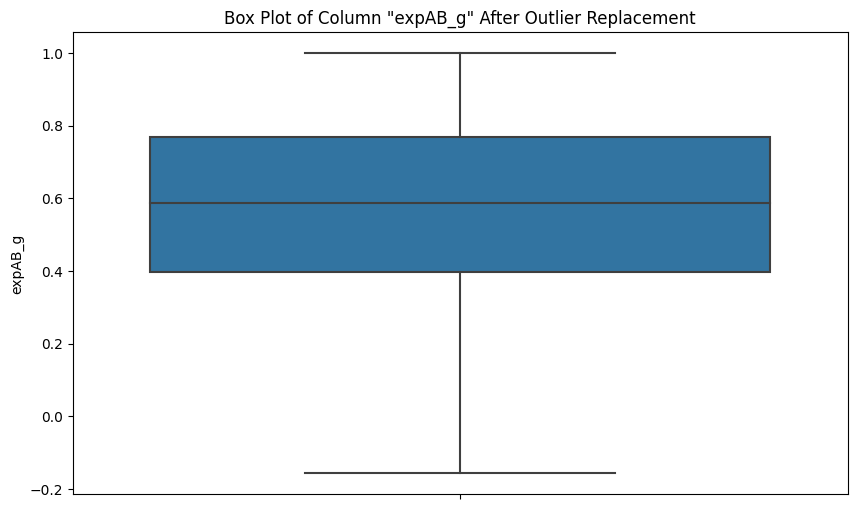

Column: expAB_r
Upper Bound for Outliers: 1.3066260124999998
Lower Bound for Outliers: -0.11391288749999995


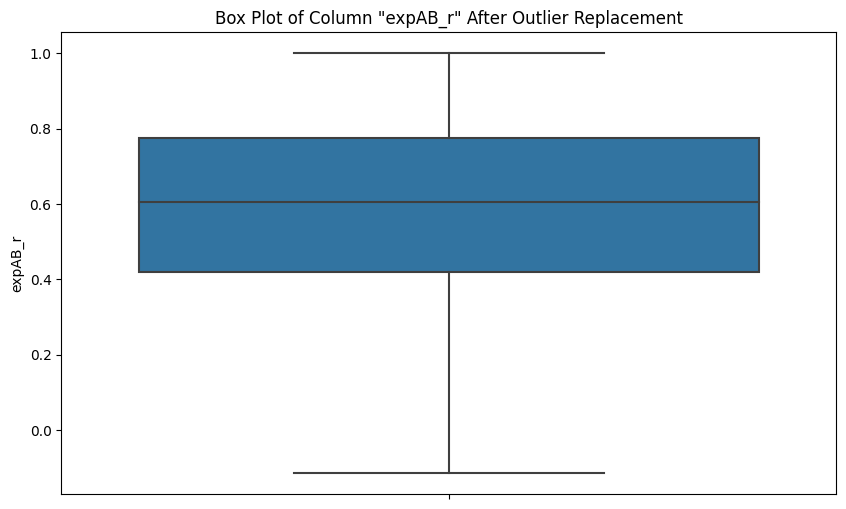

Column: expAB_i
Upper Bound for Outliers: 1.3048134
Lower Bound for Outliers: -0.1130384000000001


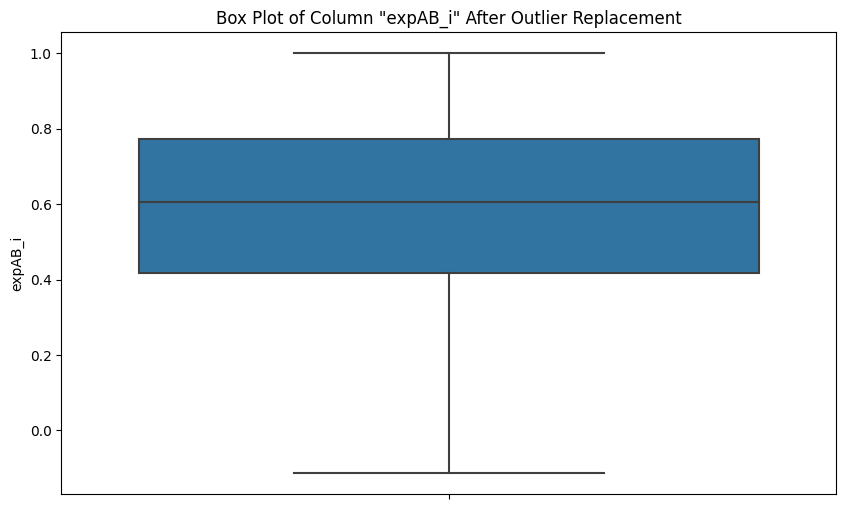

Column: expAB_z
Upper Bound for Outliers: 1.3088449624999998
Lower Bound for Outliers: -0.17524673749999997


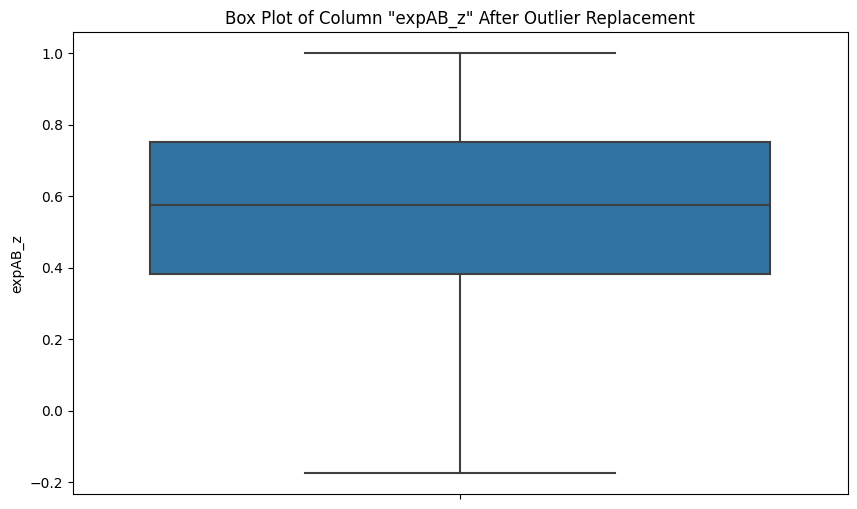

Column: redshift
Upper Bound for Outliers: 0.25411610250000005
Lower Bound for Outliers: -0.06313203750000003


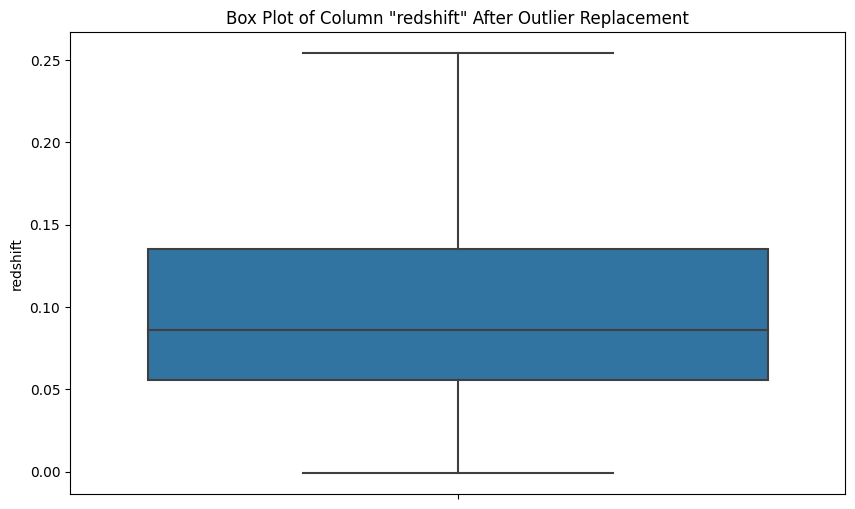

Column: redshift_err
Upper Bound for Outliers: 2.6857152750000003e-05
Lower Bound for Outliers: -3.554101250000002e-06


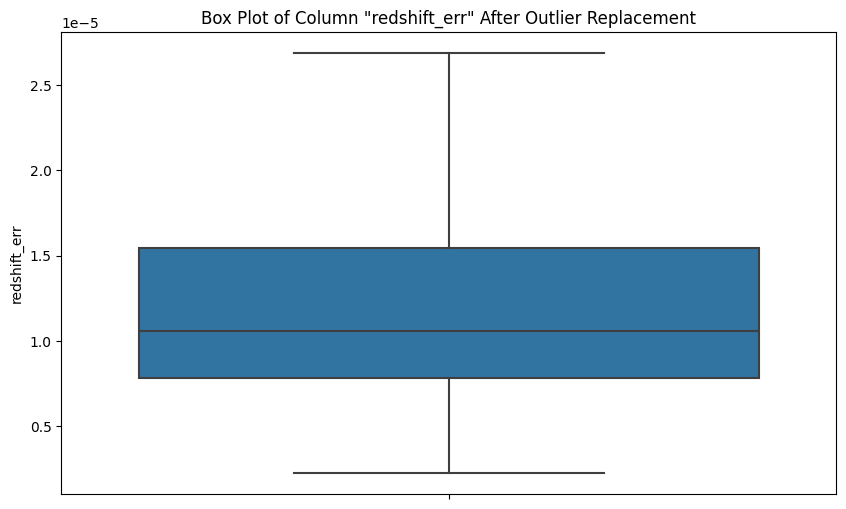

In [31]:
# Specify the target column
target_column = 'subclass'

# Function to handle outliers for a given column
def handle_outliers(column):
    # Calculate quantiles
    quant = column.quantile(q=[0.75, 0.25])
    Q3 = quant.loc[0.75]
    Q1 = quant.loc[0.25]

    # Calculate IQR
    IQR = Q3 - Q1

    # Define whisker bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Replace outliers with the bounds
    column = np.where(column > upper_bound, upper_bound, column)
    column = np.where(column < lower_bound, lower_bound, column)
    
    return column, upper_bound, lower_bound

# Exclude the target column and handle outliers for remaining numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols = [col for col in numeric_cols if col != target_column]

for col in numeric_cols:
    # Handle outliers
    df[col], upper_bound, lower_bound = handle_outliers(df[col])
    
    # Print bounds
    print(f'Column: {col}')
    print(f'Upper Bound for Outliers: {upper_bound}')
    print(f'Lower Bound for Outliers: {lower_bound}')
    
    # Visualize with a box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of Column "{col}" After Outlier Replacement')
    plt.show()

In [32]:
df.shape

(100000, 38)

In [33]:
X=df.drop(['subclass'],axis=1)
y=df['subclass']

## Selecting best Features using Select K Best
**We selected 10 features out of 43 using Select K Best algorithm to enhance the predictive power and reduce dimensionality in our dataset.**

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector=SelectKBest(score_func=f_classif,k=10)

X_selected=selector.fit_transform(X,y)

selected_features=X.columns[selector.get_support()]

print("selected features",selected_features)

selected features Index(['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z'],
      dtype='object')


### Balancing Value Counts using Smote
**We balanced the value counts in our dataset using SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance and improve the robustness of our machine learning model.**

In [35]:
print(pd.Series(y).value_counts())

subclass
0    74993
1    25007
Name: count, dtype: int64


In [36]:
smote=SMOTE(random_state=42)
X_resampled,y_resampled=smote.fit_resample(X,y)
print(pd.Series(y_resampled).value_counts())

subclass
0    74993
1    74993
Name: count, dtype: int64


## Splitting data into train and test

In [37]:
df1=df[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z','subclass']]

In [38]:
x=df1[['r', 'i', 'z', 'petroRad_g', 'petroRad_r', 'petroR50_u', 'petroR50_g',
       'petroR50_i', 'petroR50_r', 'petroR50_z']]
y=df1["subclass"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

## Scaling the feature variables using standardscaler method

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(x_train)

# **Model Building**

## Training the model in multiple algorithms

#### **Decision Tree Classifier :**

In [55]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("----------------------------------------------------------")
print("Classification report:\n",classification_report(y_test,y_pred))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(y_pred,y_test))

Confusion Matrix:
 [[12823  2220]
 [ 2077  2880]]
----------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86     15043
           1       0.56      0.58      0.57      4957

    accuracy                           0.79     20000
   macro avg       0.71      0.72      0.71     20000
weighted avg       0.79      0.79      0.79     20000

----------------------------------------------------------
accuracy score: 0.78515


#### **Logistic Regression:**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lg=LogisticRegression()

log=lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("----------------------------------------------------------")
print("Classification report:\n",classification_report(y_test,y_pred))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(y_pred,y_test))

Confusion Matrix:
 [[14057   986]
 [ 2469  2488]]
----------------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89     15043
           1       0.72      0.50      0.59      4957

    accuracy                           0.83     20000
   macro avg       0.78      0.72      0.74     20000
weighted avg       0.82      0.83      0.82     20000

----------------------------------------------------------
accuracy score: 0.82725


#### **Random Forest Classifier:**

In [42]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
RFtrain=RF.predict(x_train)
RFtest=RF.predict(x_test)



In [59]:
# print classification report,confusion matrix of train data
print(confusion_matrix(RFtrain,y_train))
print("----------------------------------------------------------")
print(classification_report(RFtrain,y_train))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(RFtrain,y_train))


[[59950    96]
 [    0 19954]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60046
           1       1.00      1.00      1.00     19954

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

----------------------------------------------------------
accuracy score: 0.9988


In [60]:
print(confusion_matrix(RFtest,y_test))
print("----------------------------------------------------------")
print(classification_report(RFtest,y_test))
print("----------------------------------------------------------")
print("accuracy score:",accuracy_score(RFtest,y_test))

[[14027  2150]
 [ 1016  2807]]
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     16177
           1       0.57      0.73      0.64      3823

    accuracy                           0.84     20000
   macro avg       0.75      0.80      0.77     20000
weighted avg       0.86      0.84      0.85     20000

----------------------------------------------------------
accuracy score: 0.8417


# **Model Deployment**

## Save the Best Model

In [46]:
import pickle
pickle.dump(RF,open("RF.pkl","wb"))

## Test the model

In [47]:
RF.predict([[16.946170,16.708910,207.218700,4.180779,4.060687,194.731000,2.141953,2.149080,2.056686,2.055798]])

array([0], dtype=int64)

In [48]:
RF.predict([[17.67528,17.52775,104.25655,3.397512,3.424717,90.717547,1.613005,1.632243,1.548225,1.596137]])

array([0], dtype=int64)